In [120]:
import pandas as pd

In [121]:
#Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
# Import Necessary libraries
import os 

# Set Directory path for Dataset
os.chdir("/content/drive/My Drive/")

In [123]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/My Drive/Final Dataset NEWSPAPERBD.csv',parse_dates=['Publish Date'])

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15565 entries, 0 to 15564
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Url                                 15565 non-null  object
 1   News Paper Name                     15565 non-null  object
 2   Publish Date                        15565 non-null  object
 3   State                               10861 non-null  object
 4   City                                15565 non-null  object
 5   Country                             15565 non-null  object
 6   Headline of the article in Bengali  15565 non-null  object
 7   Headline of the article in English  15565 non-null  object
 8   Text of the Article                 15545 non-null  object
 9   Summarry of the Article             15438 non-null  object
 10  Category                            15565 non-null  object
 11  Sub-category                        11903 non-null  ob

In [125]:
df = pd.DataFrame(columns = ['Date'])

In [126]:
df['Date'] = data['Publish Date'].copy()

In [127]:
df

Date
0      2020-05-13 13:28:15+06:00
1      2020-05-13 00:00:00+06:00
2      2020-05-13 00:00:00+06:00
3      2020-05-12 23:00:04+06:00
4      2020-05-12 21:27:34+06:00
...                          ...
15560        2020-01-28 02:00:00
15561        2020-01-27 20:34:00
15562        2020-01-27 18:06:00
15563        2020-01-26 18:01:00
15564        2020-01-25 21:17:00

[15565 rows x 1 columns]

# Object to DateTime

In [128]:
df['Date'] = pd.to_datetime(df['Date'], utc=True)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15565 entries, 0 to 15564
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Date    15565 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 121.7 KB


In [130]:
df['quantity'] = 1          #For counting news

In [131]:
df = df.set_index('Date')

In [132]:
df

quantity
Date                               
2020-05-13 07:28:15+00:00         1
2020-05-12 18:00:00+00:00         1
2020-05-12 18:00:00+00:00         1
2020-05-12 17:00:04+00:00         1
2020-05-12 15:27:34+00:00         1
...                             ...
2020-01-28 02:00:00+00:00         1
2020-01-27 20:34:00+00:00         1
2020-01-27 18:06:00+00:00         1
2020-01-26 18:01:00+00:00         1
2020-01-25 21:17:00+00:00         1

[15565 rows x 1 columns]

In [133]:
df2 = df.sort_index()

In [134]:
df2 = df2['2020'].copy()

In [135]:
!pip install stldecompose

# Decomposing

In [136]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

# the main library has a small set of functionality
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive,
                                         drift, 
                                         mean, 
                                         seasonal_naive)


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Resampling in weekly

In [137]:
obsD = (df2
       .resample('D')
       .sum()
       .interpolate('linear'))

obsD

quantity
Date                               
2020-01-21 00:00:00+00:00         1
2020-01-22 00:00:00+00:00         2
2020-01-23 00:00:00+00:00         0
2020-01-24 00:00:00+00:00         0
2020-01-25 00:00:00+00:00         6
...                             ...
2020-05-15 00:00:00+00:00       320
2020-05-16 00:00:00+00:00      2017
2020-05-17 00:00:00+00:00        48
2020-05-18 00:00:00+00:00        55
2020-05-19 00:00:00+00:00        64

[120 rows x 1 columns]

In [138]:
obsD.to_csv('Daily News.csv')

In [139]:
obs = (df2
       .resample('D')
       .sum()
       .interpolate('linear'))

obs.head(10)

quantity
Date                               
2020-01-21 00:00:00+00:00         1
2020-01-22 00:00:00+00:00         2
2020-01-23 00:00:00+00:00         0
2020-01-24 00:00:00+00:00         0
2020-01-25 00:00:00+00:00         6
2020-01-26 00:00:00+00:00        11
2020-01-27 00:00:00+00:00        10
2020-01-28 00:00:00+00:00         9
2020-01-29 00:00:00+00:00        13
2020-01-30 00:00:00+00:00         6

In [140]:
obs.index

DatetimeIndex(['2020-01-21 00:00:00+00:00', '2020-01-22 00:00:00+00:00',
               '2020-01-23 00:00:00+00:00', '2020-01-24 00:00:00+00:00',
               '2020-01-25 00:00:00+00:00', '2020-01-26 00:00:00+00:00',
               '2020-01-27 00:00:00+00:00', '2020-01-28 00:00:00+00:00',
               '2020-01-29 00:00:00+00:00', '2020-01-30 00:00:00+00:00',
               ...
               '2020-05-10 00:00:00+00:00', '2020-05-11 00:00:00+00:00',
               '2020-05-12 00:00:00+00:00', '2020-05-13 00:00:00+00:00',
               '2020-05-14 00:00:00+00:00', '2020-05-15 00:00:00+00:00',
               '2020-05-16 00:00:00+00:00', '2020-05-17 00:00:00+00:00',
               '2020-05-18 00:00:00+00:00', '2020-05-19 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=120, freq='D')

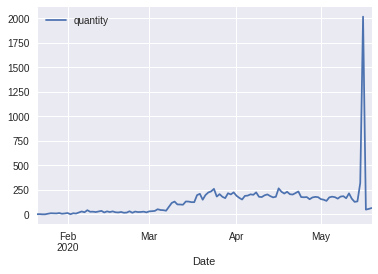

In [141]:
obs.plot()

In [142]:
decomp = decompose(obs, period=7)

decomp

# Decompose Plot

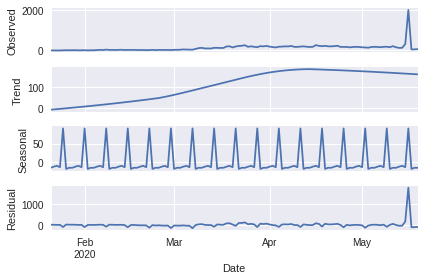

In [143]:
decomp.plot();

# Plotting ovserved,trend, seasonal,residual individually

### Observe

<Figure size 7200x2520 with 0 Axes>

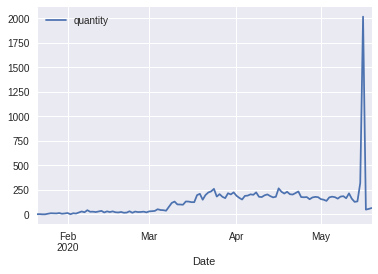

In [144]:
plt.figure(figsize = (100,35))
decomp.observed.plot()

### Trend

<Figure size 7200x2520 with 0 Axes>

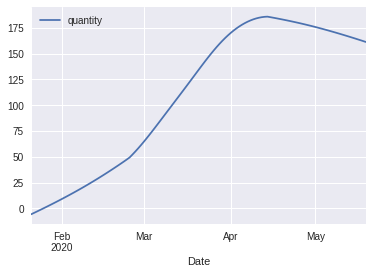

In [145]:
plt.figure(figsize = (100,35))
decomp.trend.plot()

### seasonal

<Figure size 7200x2520 with 0 Axes>

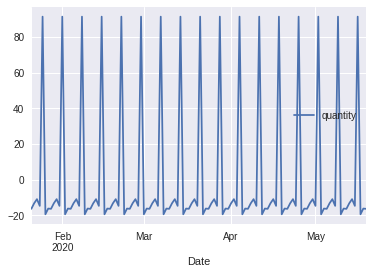

In [146]:
plt.figure(figsize = (100,35))
decomp.seasonal.plot()

### residual

<Figure size 7200x2520 with 0 Axes>

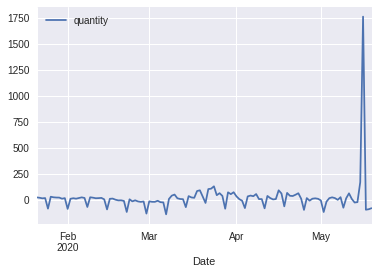

In [147]:
plt.figure(figsize = (100,35))
decomp.resid.plot()

# Final Plot

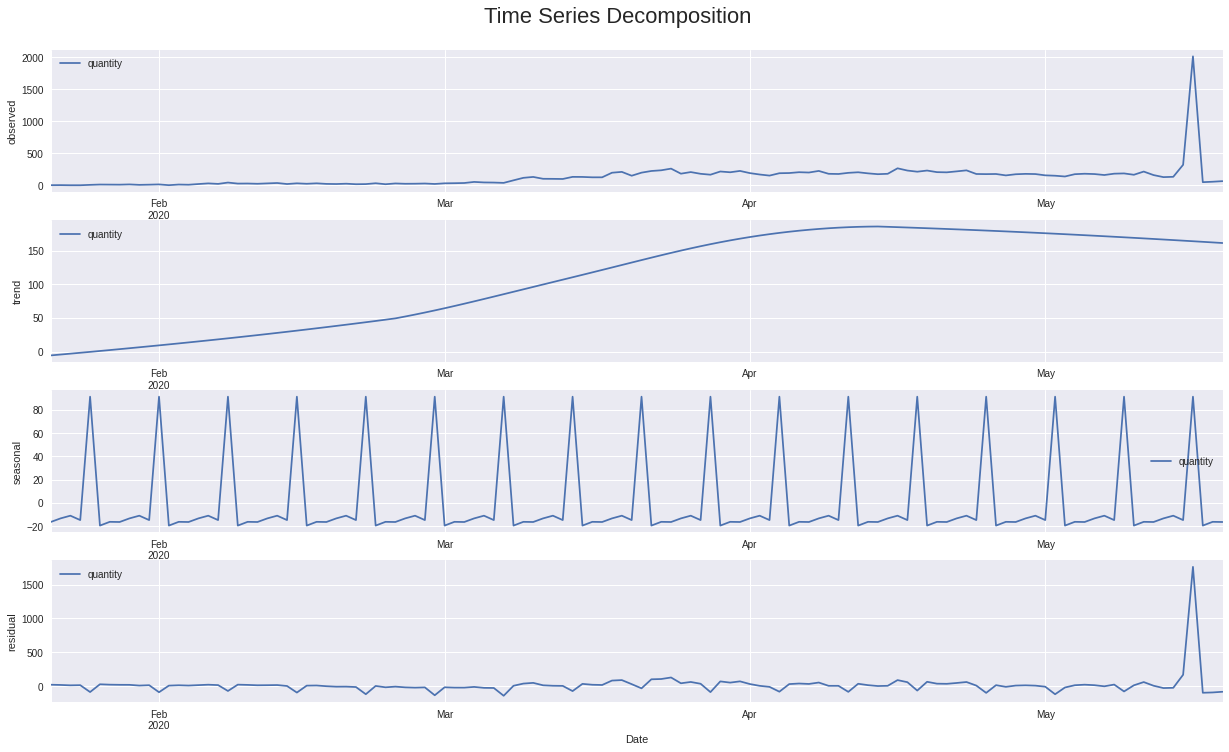

In [148]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Time Series Decomposition', fontsize=22, y=0.93)  
fig.savefig('Time Series Decomposition 0.png')

In [149]:
decom = decompose(obsD, period=7)

decom

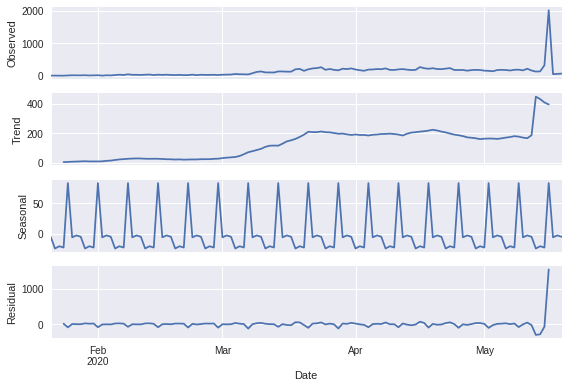

<Figure size 720x360 with 0 Axes>

In [150]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = obsD.copy()
result = seasonal_decompose(series, model='additive')
result.plot()
plt.figure(figsize = (10,5))
plt.show()


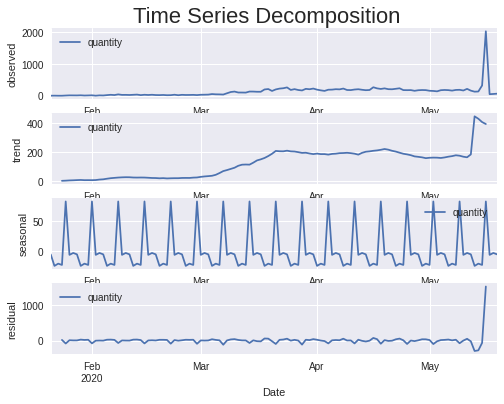

In [229]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(8,6))
result.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Time Series Decomposition', fontsize=22, y=0.93)  
fig.savefig('Time Series Decomposition.png')

# **Sub-Categories Time Series Decomposition**

In [152]:
df['Category'] = data['Category'].values
df['Sub-category'] = data['Sub-category'].values

In [153]:
filt1 = df['Category'] == 'Statistics'
filt2 = df['Category'] == 'Solidarity and cooperation'
filt3 = df['Category'] == 'Health Organizations Responses'

In [154]:
df.loc[filt1, ['Sub-category']] = 'Statistics'
df.loc[filt2, ['Sub-category']] = 'Solidarity and cooperation'
df.loc[filt3, ['Sub-category']] = 'Health Organizations Responses'

In [155]:
a = df['Sub-category'].unique()
a

array(['Statistics', 'Global economic impact of Corona virus',
       'Social impact', 'Positive patient symptoms and identification',
       'Government guidelines, instructions and mobilization',
       'Strategic preparedness and response plan',
       'External support, Aids', 'Solidarity and cooperation',
       'Severe health outcomes and deaths', 'Repatriation',
       'Protestation', 'Health Organizations Responses',
       'Negative cases and Corona virus recovery stories',
       'Trip and transportation', 'Policy inconsistency', 'Sanction',
       'Public unawareness', 'Corona virus treatment and Vaccine',
       'Transmission patterns and risks',
       'Global political situation & others',
       'Spread of rumors or misinformation on corona virus',
       'Protective products and machines'], dtype=object)

In [156]:
len(a)

22

In [157]:
df

quantity  ...                                       Sub-category
Date                                 ...                                                   
2020-05-13 07:28:15+00:00         1  ...                                         Statistics
2020-05-12 18:00:00+00:00         1  ...             Global economic impact of Corona virus
2020-05-12 18:00:00+00:00         1  ...                                      Social impact
2020-05-12 17:00:04+00:00         1  ...       Positive patient symptoms and identification
2020-05-12 15:27:34+00:00         1  ...  Government guidelines, instructions and mobili...
...                             ...  ...                                                ...
2020-01-28 02:00:00+00:00         1  ...                                         Statistics
2020-01-27 20:34:00+00:00         1  ...                                       Repatriation
2020-01-27 18:06:00+00:00         1  ...                                       Repatriation
2020-01-26 18:01:00+00:00         1  ...  Government guidelines, instructions and mobili...
2020-01-25 21:17:00+00:00         1  ...  Government guidelines, instructions and mobili...

[15565 rows x 3 columns]

In [158]:
f1 = df['Sub-category'] == 'Statistics'
f2 = df['Sub-category'] == 'Global economic impact of Corona virus'
f3 = df['Sub-category'] == 'Social impact'
f4 = df['Sub-category'] == 'Positive patient symptoms and identification'
f5 = df['Sub-category'] == 'Government guidelines, instructions and mobilization'
f6 = df['Sub-category'] == 'Strategic preparedness and response plan'
f7 = df['Sub-category'] == 'External support, Aids'
f8 = df['Sub-category'] == 'Solidarity and cooperation'
f9 = df['Sub-category'] == 'Severe health outcomes and deaths'
f10 = df['Sub-category'] == 'Repatriation'
f11 = df['Sub-category'] == 'Protestation'
f12 = df['Sub-category'] == 'Health Organizations Responses'
f13 = df['Sub-category'] == 'Negative cases and Corona virus recovery stories'
f14 = df['Sub-category'] == 'Trip and transportation'
f15 = df['Sub-category'] == 'Policy inconsistency'
f16 = df['Sub-category'] == 'Sanction'
f17 = df['Sub-category'] == 'Public unawareness'
f18 = df['Sub-category'] == 'Corona virus treatment and Vaccine'
f19 = df['Sub-category'] == 'Transmission patterns and risks'
f20 = df['Sub-category'] == 'Global political situation & others'
f21 = df['Sub-category'] == 'Spread of rumors or misinformation on corona virus'
f22 = df['Sub-category'] == 'Protective products and machines'

In [159]:
d1 = df[f1].copy()
d2 = df[f2].copy()
d3 = df[f3].copy()
d4 = df[f4].copy()
d5 = df[f5].copy()
d6 = df[f6].copy()
d7 = df[f7].copy()
d8 = df[f8].copy()
d9 = df[f9].copy()
d10 = df[f10].copy()
d11 = df[f11].copy()
d12 = df[f12].copy()
d13 = df[f13].copy()
d14 = df[f14].copy()
d15 = df[f15].copy()
d16 = df[f16].copy()
d17 = df[f17].copy()
d18 = df[f18].copy()
d19 = df[f19].copy()
d20 = df[f20].copy()
d21 = df[f21].copy()
d22 = df[f22].copy()


In [160]:
o1 = (d1.resample('W').sum().interpolate('linear'))
o2 = (d2.resample('W').sum().interpolate('linear'))
o3 = (d3.resample('W').sum().interpolate('linear'))
o4 = (d4.resample('W').sum().interpolate('linear'))
o5 = (d5.resample('W').sum().interpolate('linear'))
o6 = (d6.resample('W').sum().interpolate('linear'))
o7 = (d7.resample('W').sum().interpolate('linear'))
o8 = (d8.resample('W').sum().interpolate('linear'))
o9 = (d9.resample('W').sum().interpolate('linear'))
o10 = (d10.resample('W').sum().interpolate('linear'))
o11 = (d11.resample('W').sum().interpolate('linear'))
o12 = (d12.resample('W').sum().interpolate('linear'))
o13 = (d13.resample('W').sum().interpolate('linear'))
o14 = (d14.resample('W').sum().interpolate('linear'))
o15 = (d15.resample('W').sum().interpolate('linear'))
o16 = (d16.resample('W').sum().interpolate('linear'))
o17 = (d17.resample('W').sum().interpolate('linear'))
o18 = (d18.resample('W').sum().interpolate('linear'))
o19 = (d19.resample('W').sum().interpolate('linear'))
o20 = (d20.resample('W').sum().interpolate('linear'))
o21 = (d21.resample('W').sum().interpolate('linear'))
o22 = (d22.resample('W').sum().interpolate('linear'))

In [161]:
decomp1 = decompose(o1, period=7)
decomp2 = decompose(o2, period=7)
decomp3 = decompose(o3, period=7)
decomp4 = decompose(o4, period=7)
decomp5 = decompose(o5, period=7)
decomp6 = decompose(o6, period=7)
decomp7 = decompose(o7, period=7)
decomp8 = decompose(o8, period=7)
decomp9 = decompose(o9, period=7)
decomp10 = decompose(o10, period=7)
decomp11 = decompose(o11, period=7)
decomp12 = decompose(o12, period=7)
decomp13 = decompose(o13, period=7)
decomp14 = decompose(o14, period=7)
decomp15 = decompose(o15, period=7)
decomp16 = decompose(o16, period=7)
decomp17 = decompose(o17, period=7)
decomp18 = decompose(o18, period=7)
decomp19 = decompose(o19, period=7)
decomp20 = decompose(o20, period=7)
decomp21 = decompose(o21, period=7)
decomp22 = decompose(o22, period=7)

Text(0.5, 0.93, 'Statistics')

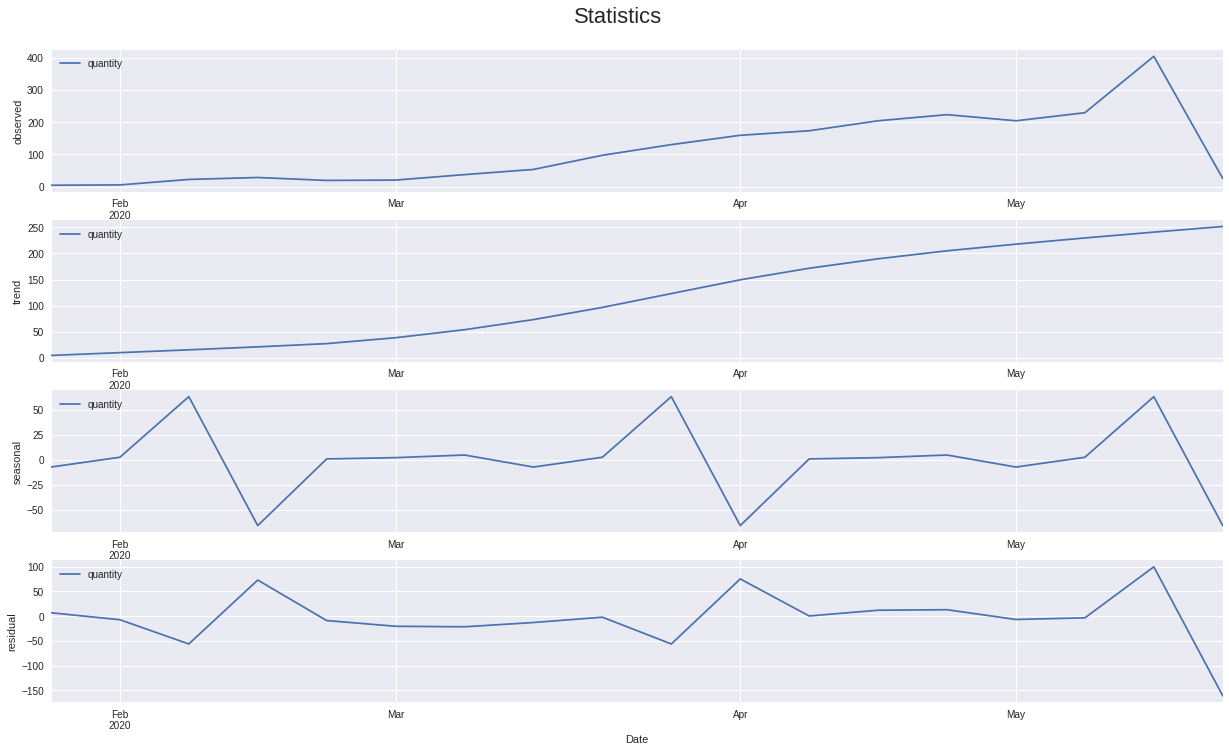

In [162]:
import matplotlib.pyplot as plt 

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp1.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp1.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp1.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp1.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Statistics', fontsize=22, y=0.93)  
# fig.savefig('Statistics.png')

Text(0.5, 0.93, 'Global economic impact of Corona virus')

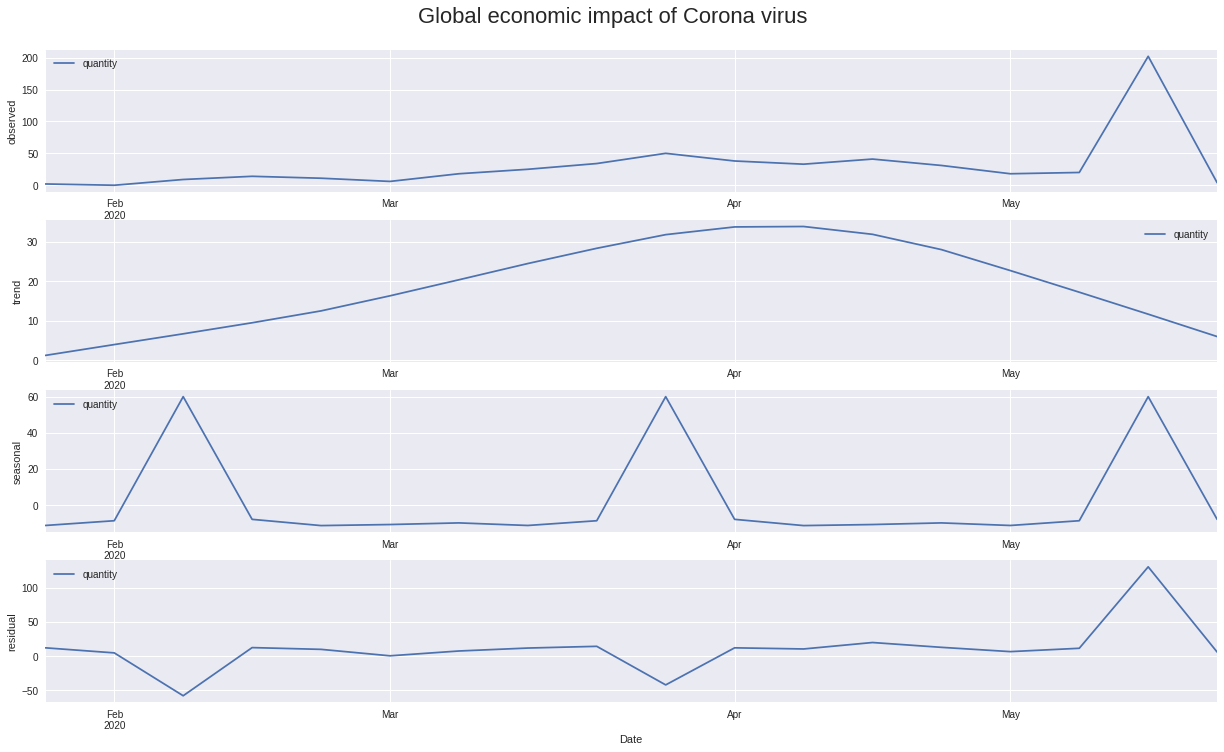

In [163]:
import matplotlib.pyplot as plt 

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp2.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp2.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp2.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp2.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Global economic impact of Corona virus', fontsize=22, y=0.93)  
# fig.savefig('Global economic impact of Corona virus.png')

Text(0.5, 0.93, 'Social impact')

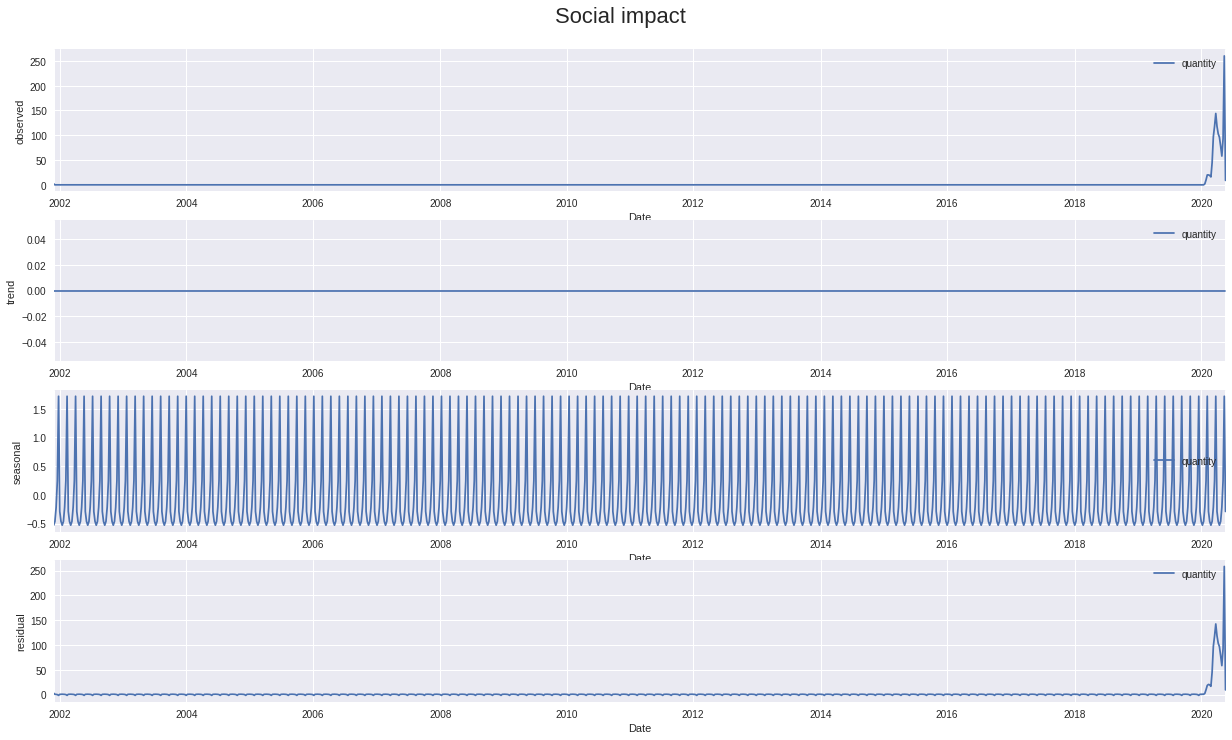

In [164]:
import matplotlib.pyplot as plt 

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp3.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp3.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp3.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp3.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Social impact', fontsize=22, y=0.93)  
# fig.savefig('Social impact.png')

Text(0.5, 0.93, 'Positive patient symptoms and identification')

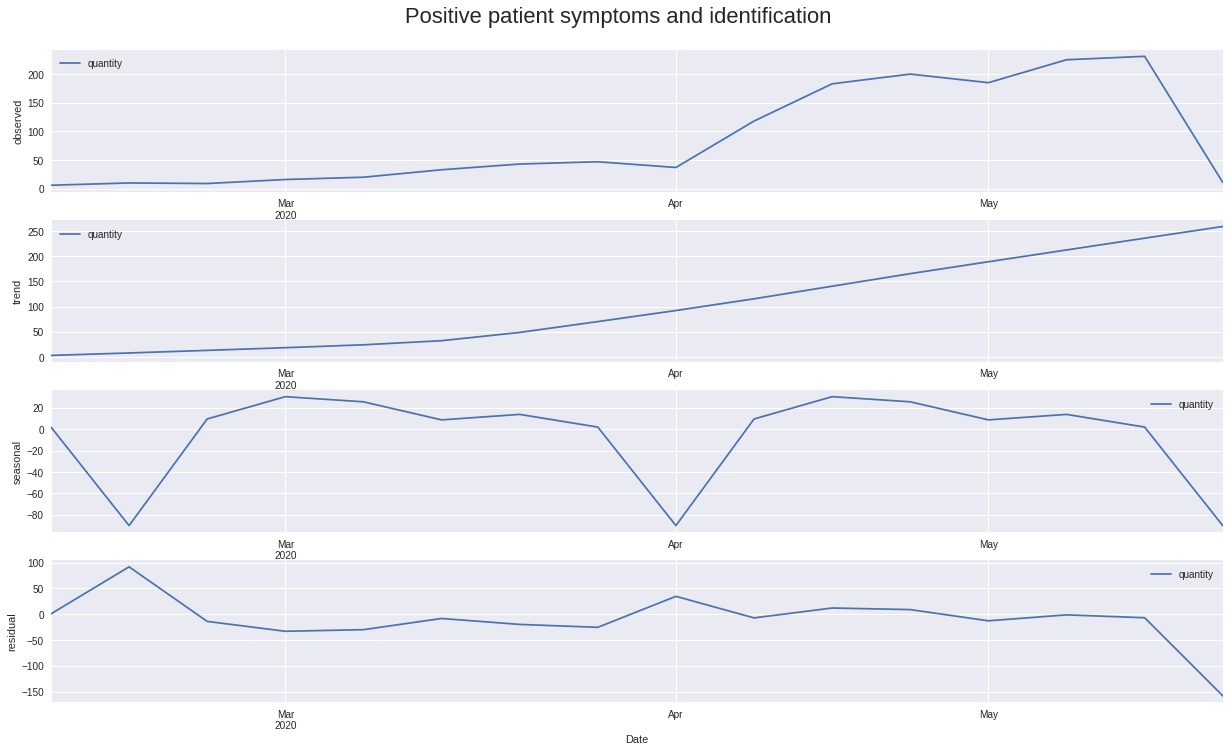

In [165]:
import matplotlib.pyplot as plt 

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp4.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp4.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp4.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp4.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Positive patient symptoms and identification', fontsize=22, y=0.93)  
# fig.savefig('Positive patient symptoms and identification.png')

Text(0.5, 0.93, 'Government guidelines, instructions and mobilization')

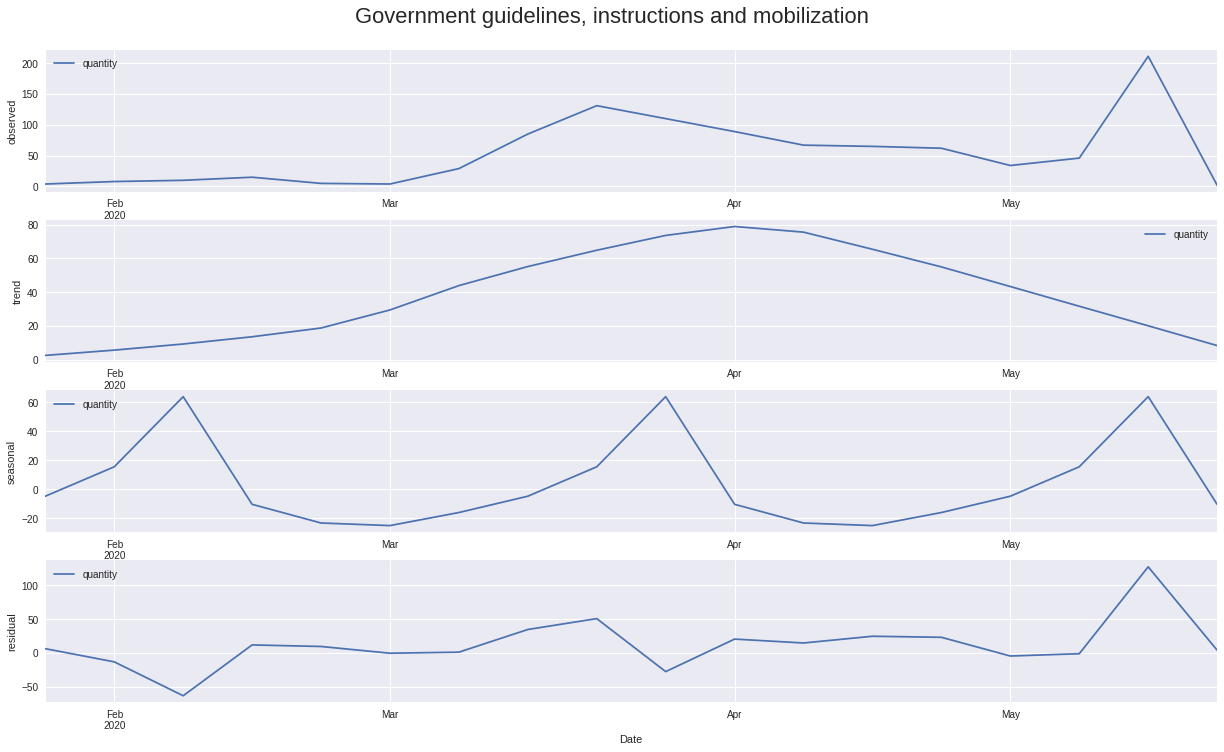

In [166]:
import matplotlib.pyplot as plt 

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp5.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp5.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp5.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp5.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Government guidelines, instructions and mobilization', fontsize=22, y=0.93)  
# fig.savefig('Government guidelines, instructions and mobilization.png')

Text(0.5, 0.93, 'Strategic preparedness and response plan')

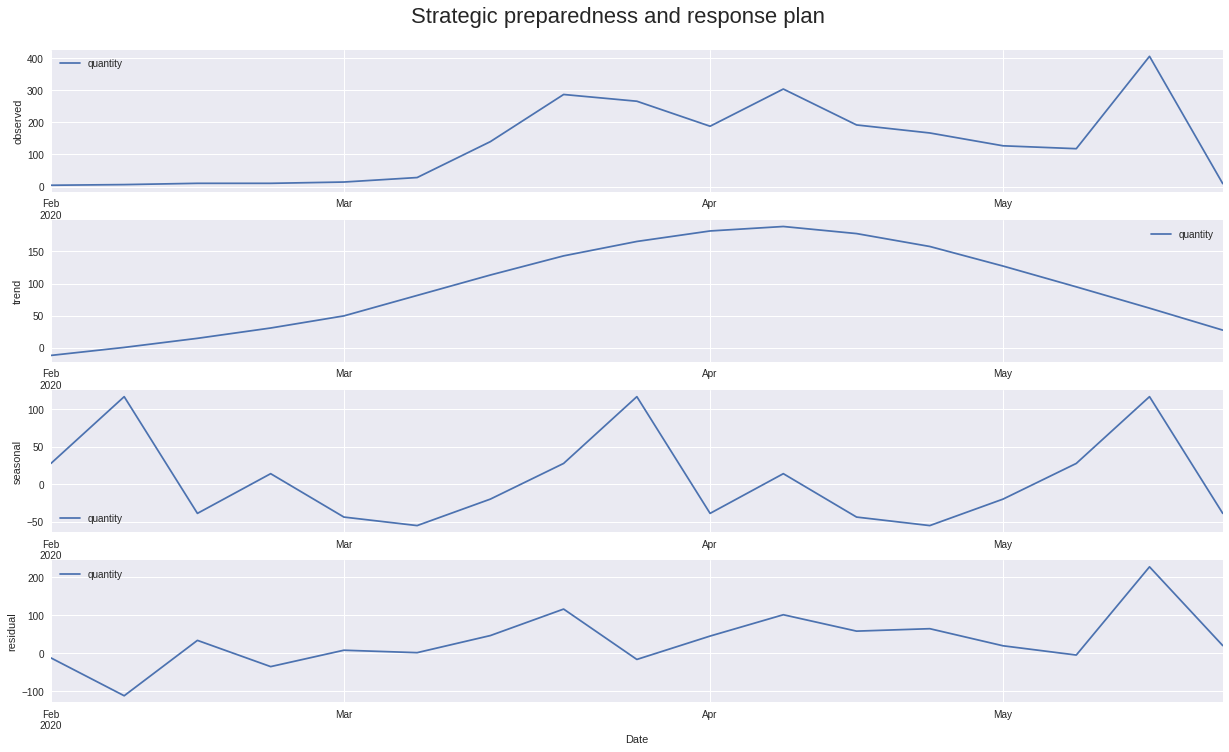

In [167]:
import matplotlib.pyplot as plt 

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp6.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp6.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp6.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp6.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Strategic preparedness and response plan', fontsize=22, y=0.93)  
# fig.savefig('Strategic preparedness and response plan.png')

Text(0.5, 0.93, 'External support, Aids')

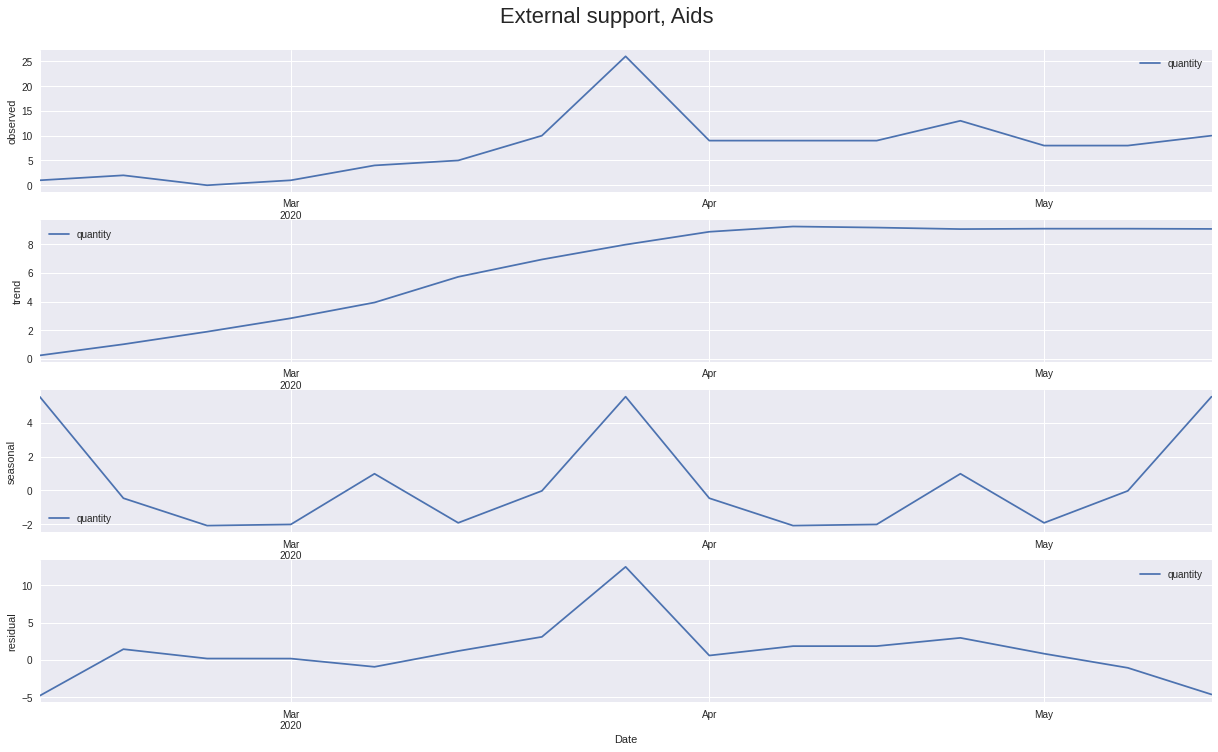

In [168]:
import matplotlib.pyplot as plt 

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp7.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp7.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp7.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp7.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('External support, Aids', fontsize=22, y=0.93)  
# fig.savefig('External support, Aids.png')

Text(0.5, 0.93, 'Solidarity and cooperation')

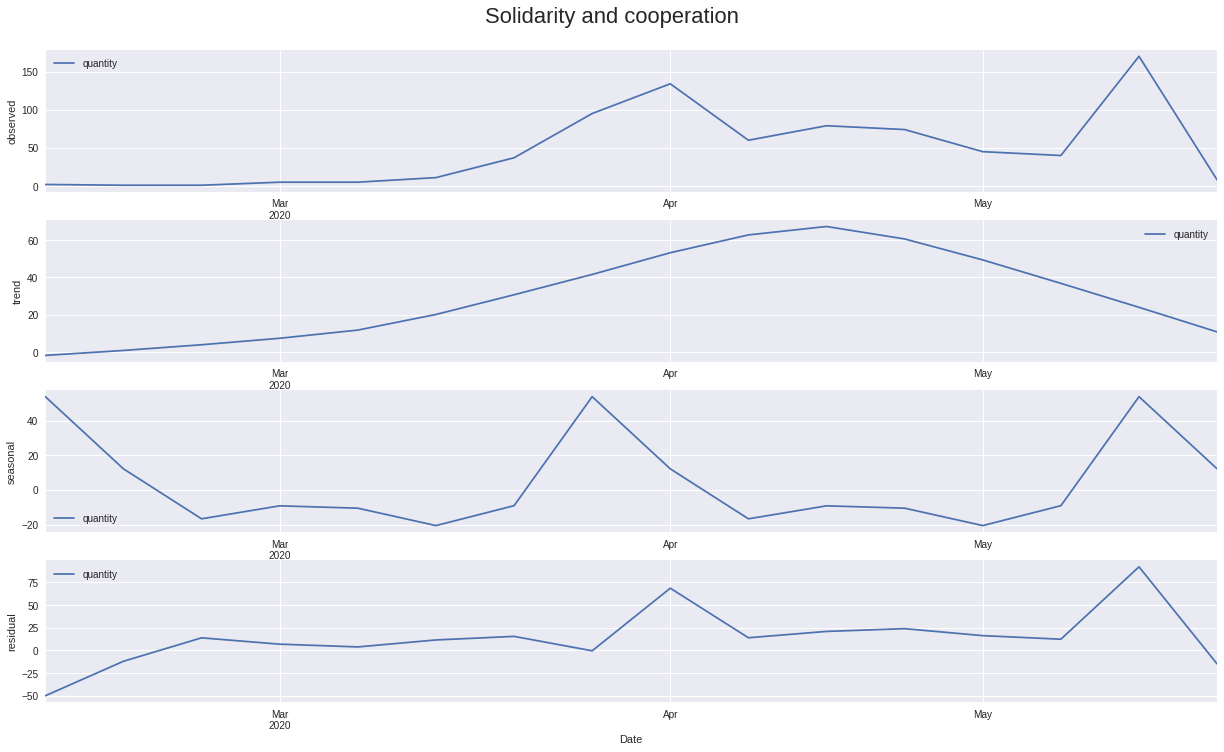

In [169]:
import matplotlib.pyplot as plt 

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp8.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp8.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp8.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp8.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Solidarity and cooperation', fontsize=22, y=0.93)  
# fig.savefig('Solidarity and cooperation.png')

Text(0.5, 0.93, 'Severe health outcomes and deaths')

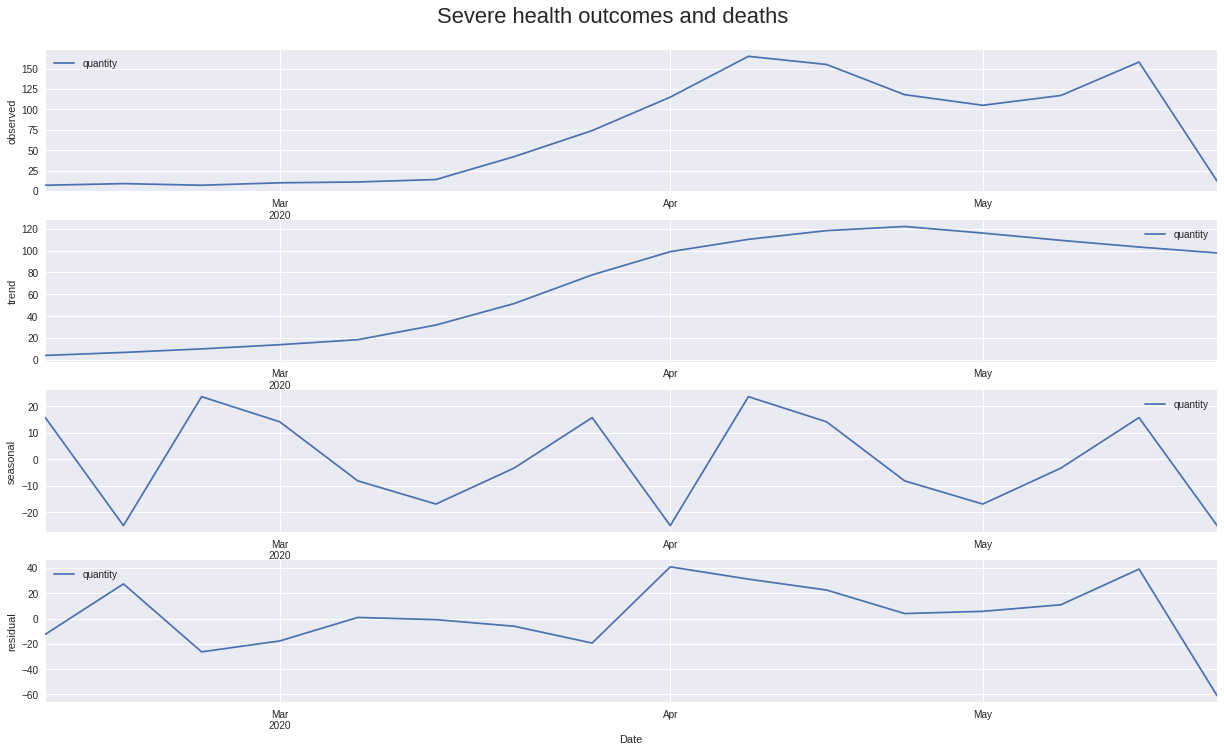

In [170]:
import matplotlib.pyplot as plt 

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp9.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp9.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp9.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp9.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Severe health outcomes and deaths', fontsize=22, y=0.93)  
# fig.savefig('Severe health outcomes and deaths.png')

Text(0.5, 0.93, 'Repatriation')

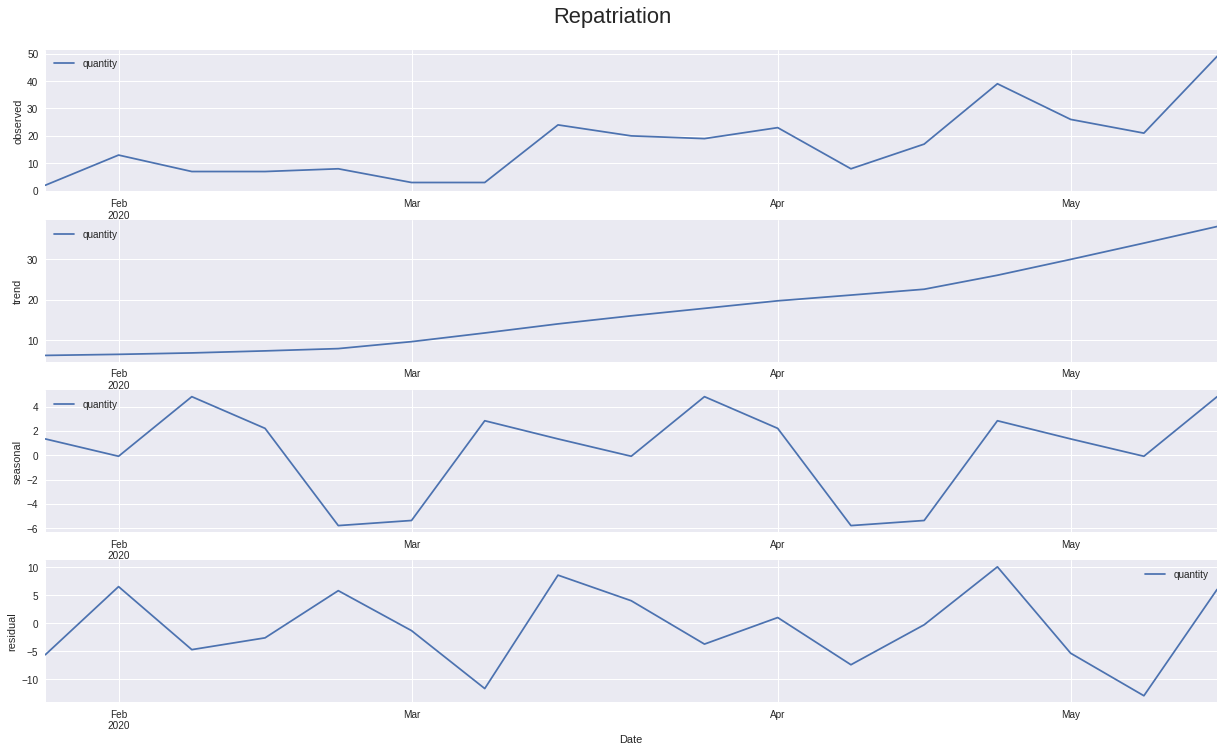

In [171]:
import matplotlib.pyplot as plt 

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp10.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp10.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp10.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp10.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Repatriation', fontsize=22, y=0.93)  
# fig.savefig('Repatriation.png')

Text(0.5, 0.93, 'Protestation')

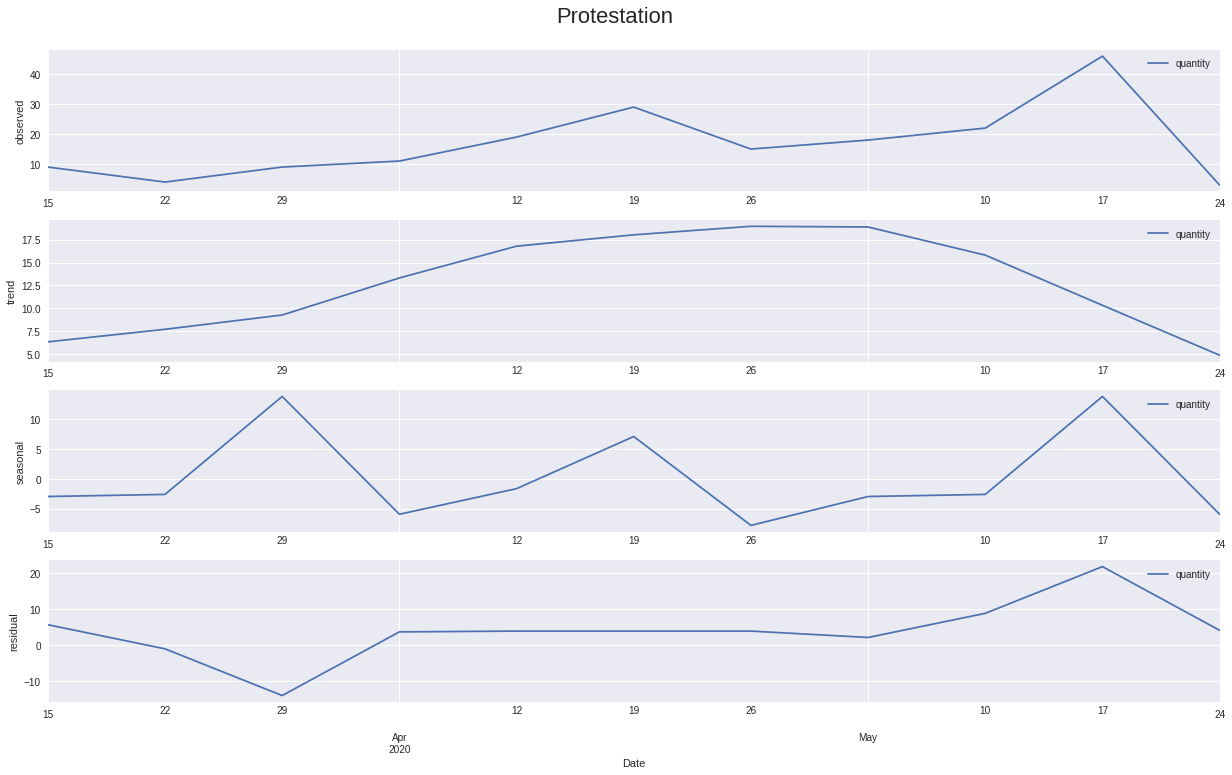

In [172]:
import matplotlib.pyplot as plt 

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp11.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp11.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp11.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp11.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Protestation', fontsize=22, y=0.93)  
# fig.savefig('Protestation.png')

Text(0.5, 0.93, 'Health Organizations Responses')

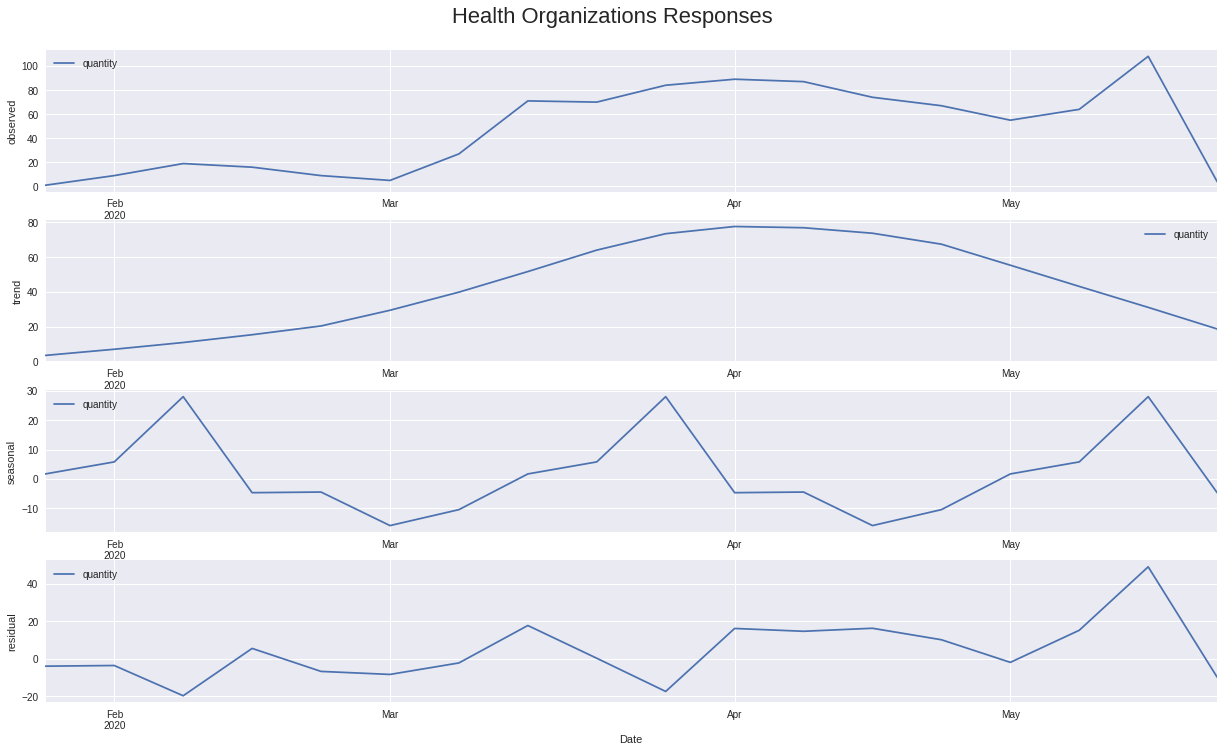

In [173]:
import matplotlib.pyplot as plt 

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp12.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp12.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp12.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp12.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Health Organizations Responses', fontsize=22, y=0.93)  
# fig.savefig('Health Organizations Responses.png')

Text(0.5, 0.93, 'Negative cases and Corona virus recovery stories')

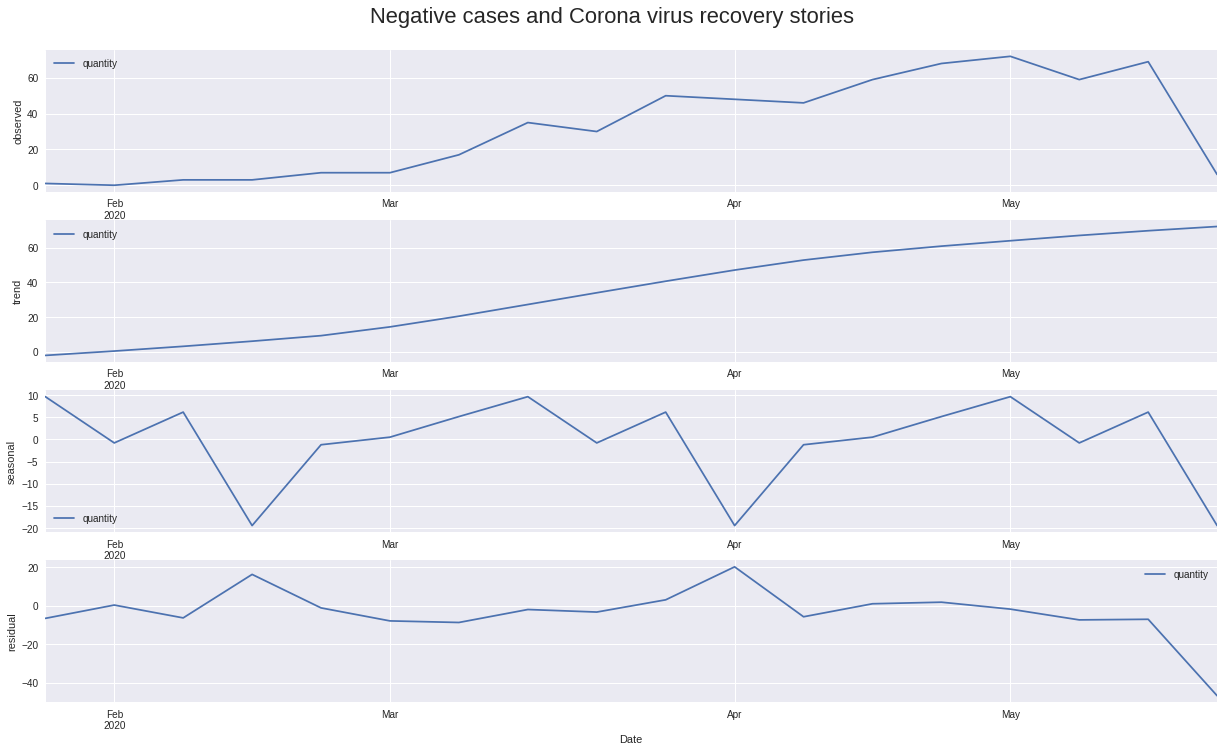

In [174]:
import matplotlib.pyplot as plt 

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp13.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp13.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp13.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp13.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Negative cases and Corona virus recovery stories', fontsize=22, y=0.93)  
# fig.savefig('Negative cases and Corona virus recovery stories.png')

Text(0.5, 0.93, 'Trip and transportation')

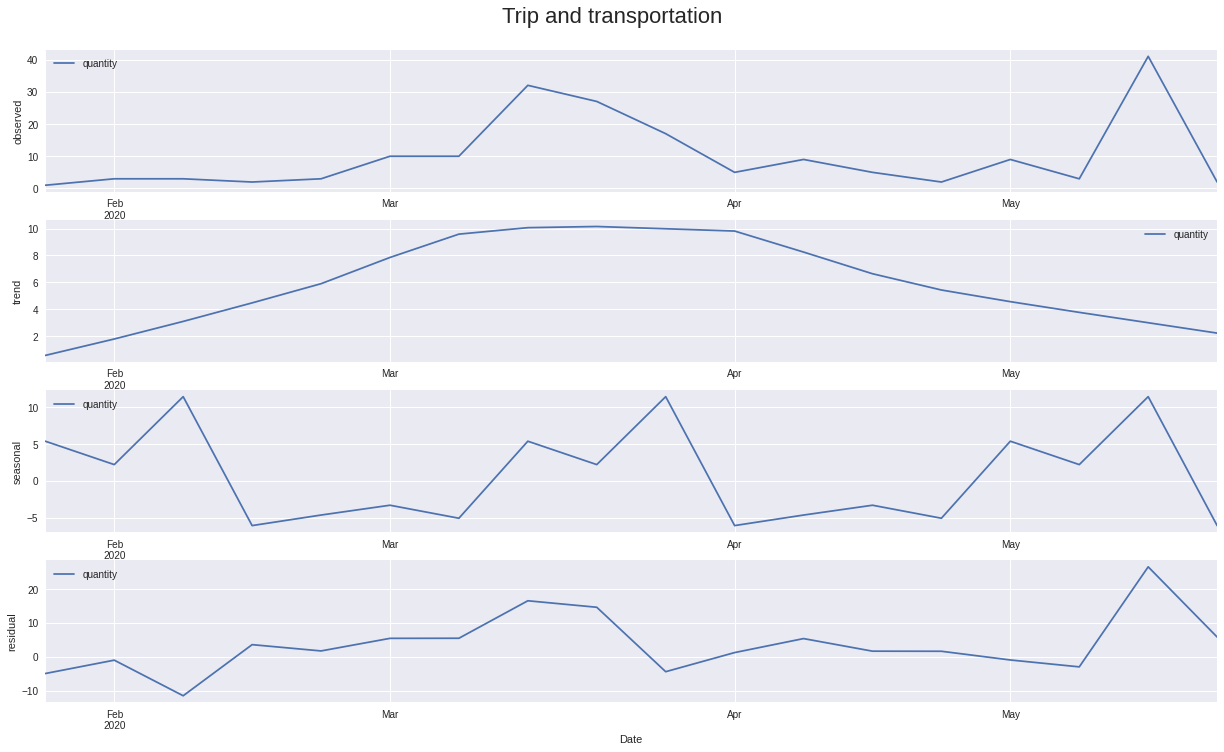

In [175]:
import matplotlib.pyplot as plt 

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp14.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp14.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp14.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp14.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Trip and transportation', fontsize=22, y=0.93)  
# fig.savefig('Trip and transportation.png')

Text(0.5, 0.93, 'Policy inconsistency')

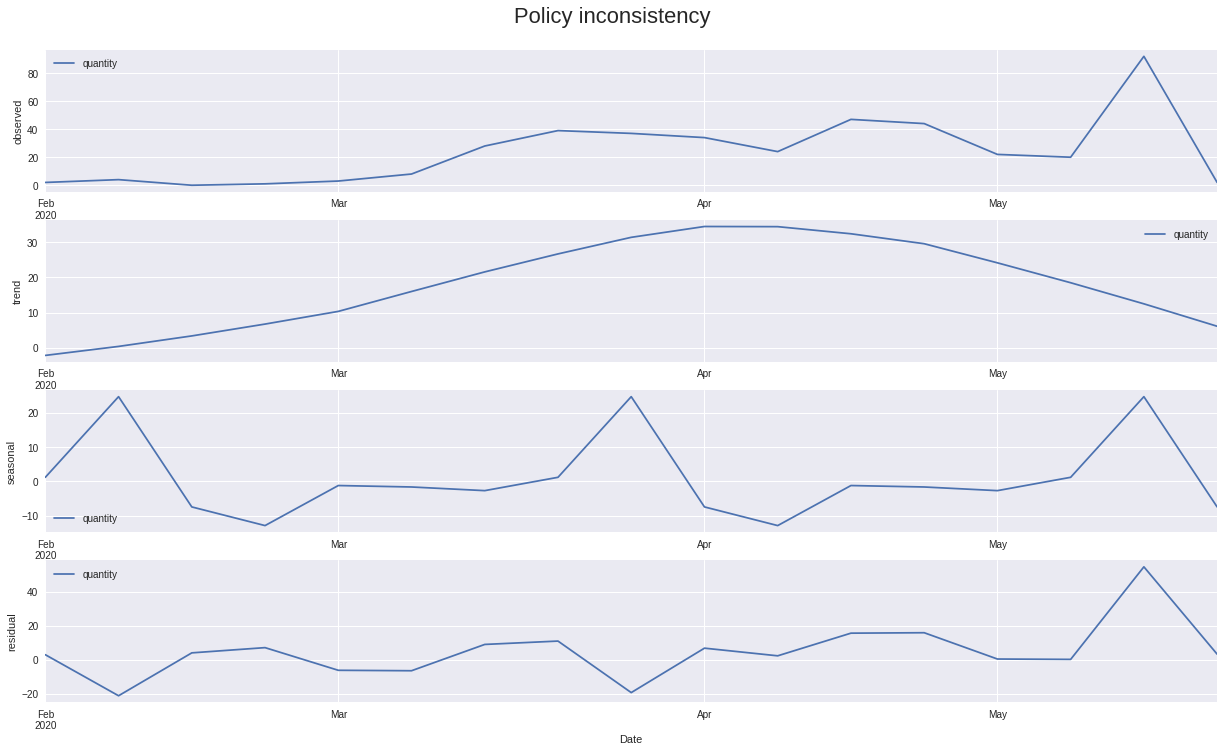

In [176]:
import matplotlib.pyplot as plt 

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp15.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp15.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp15.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp15.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Policy inconsistency', fontsize=22, y=0.93)  
# fig.savefig('Policy inconsistency.png')

Text(0.5, 0.93, 'Sanction')

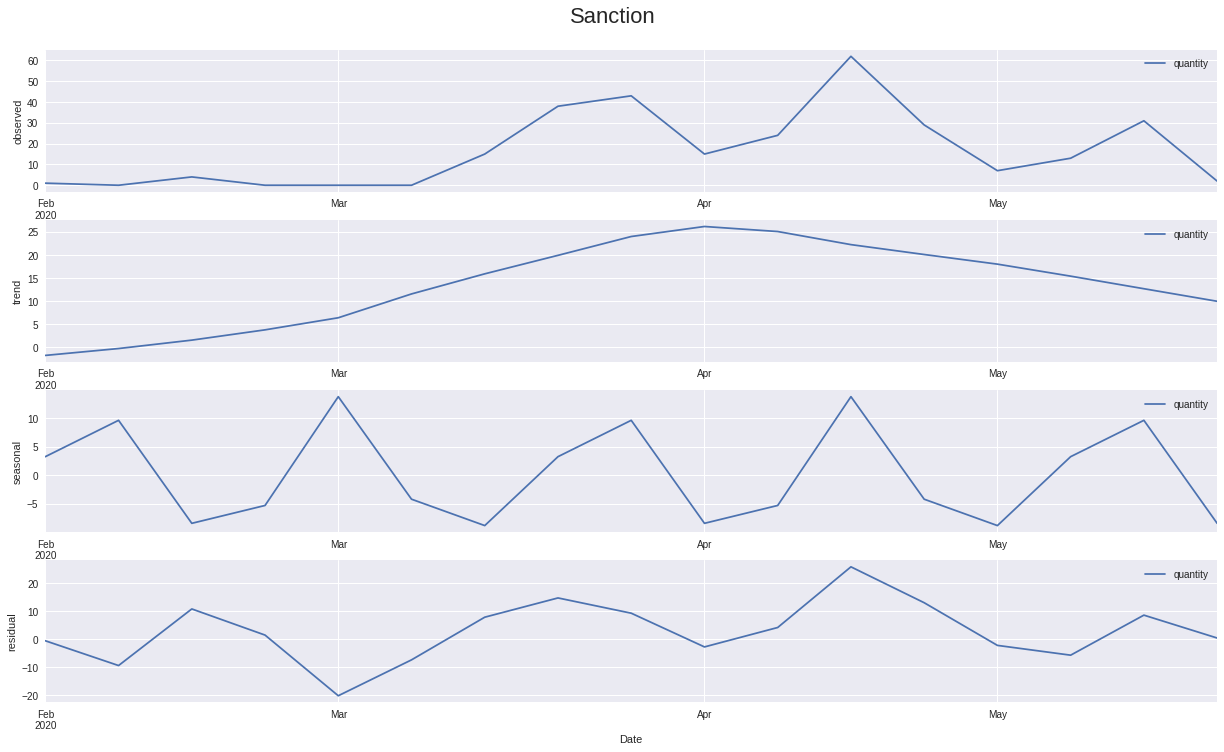

In [177]:
import matplotlib.pyplot as plt 

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp16.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp16.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp16.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp16.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Sanction', fontsize=22, y=0.93)  
# fig.savefig('Sanction.png')

Text(0.5, 0.93, 'Public unawareness')

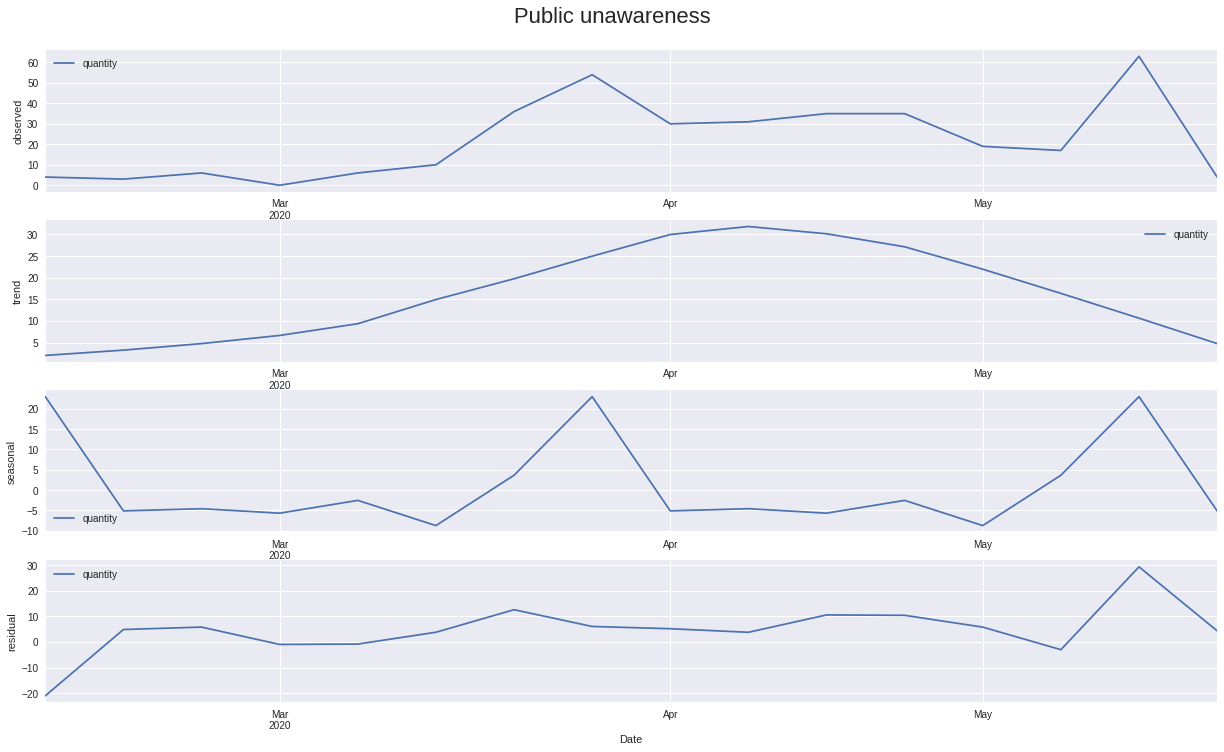

In [178]:
import matplotlib.pyplot as plt 

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp17.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp17.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp17.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp17.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Public unawareness', fontsize=22, y=0.93)  
# fig.savefig('Public unawareness.png')

Text(0.5, 0.93, 'Corona virus treatment and Vaccine')

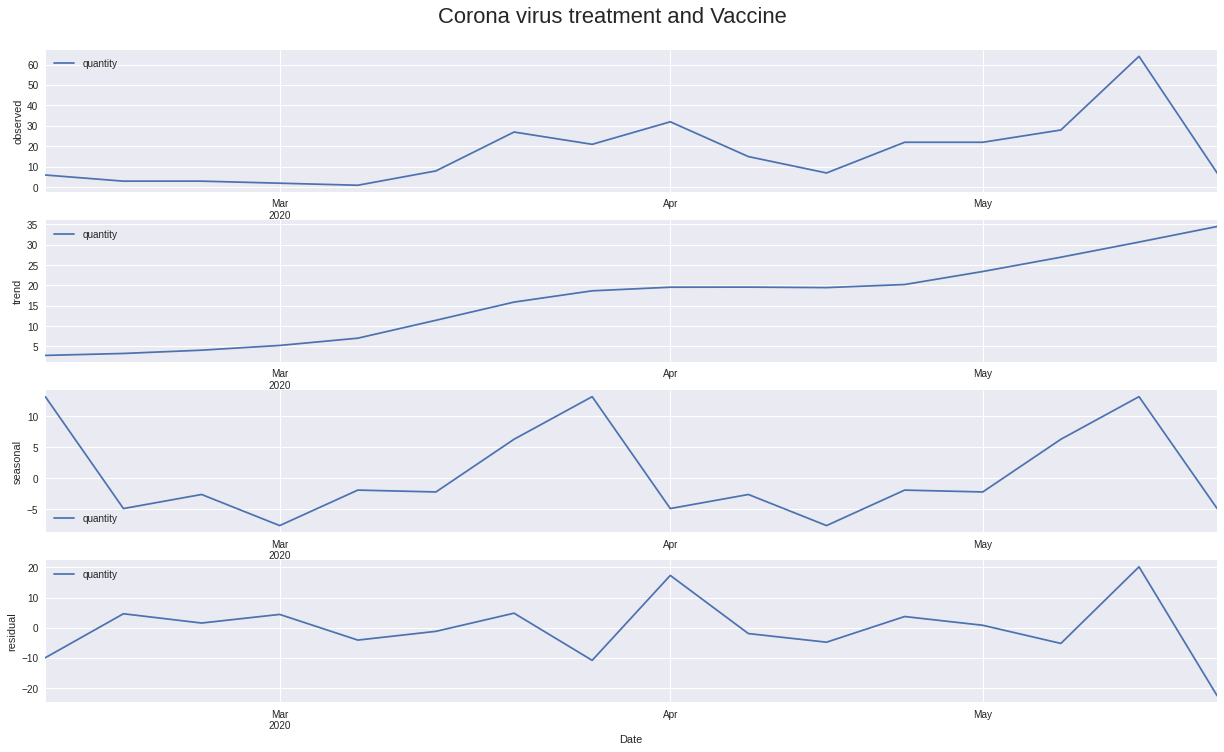

In [179]:
import matplotlib.pyplot as plt 

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp18.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp18.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp18.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp18.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Corona virus treatment and Vaccine', fontsize=22, y=0.93)  
# fig.savefig('Corona virus treatment and Vaccine.png')

Text(0.5, 0.93, 'Transmission patterns and risks')

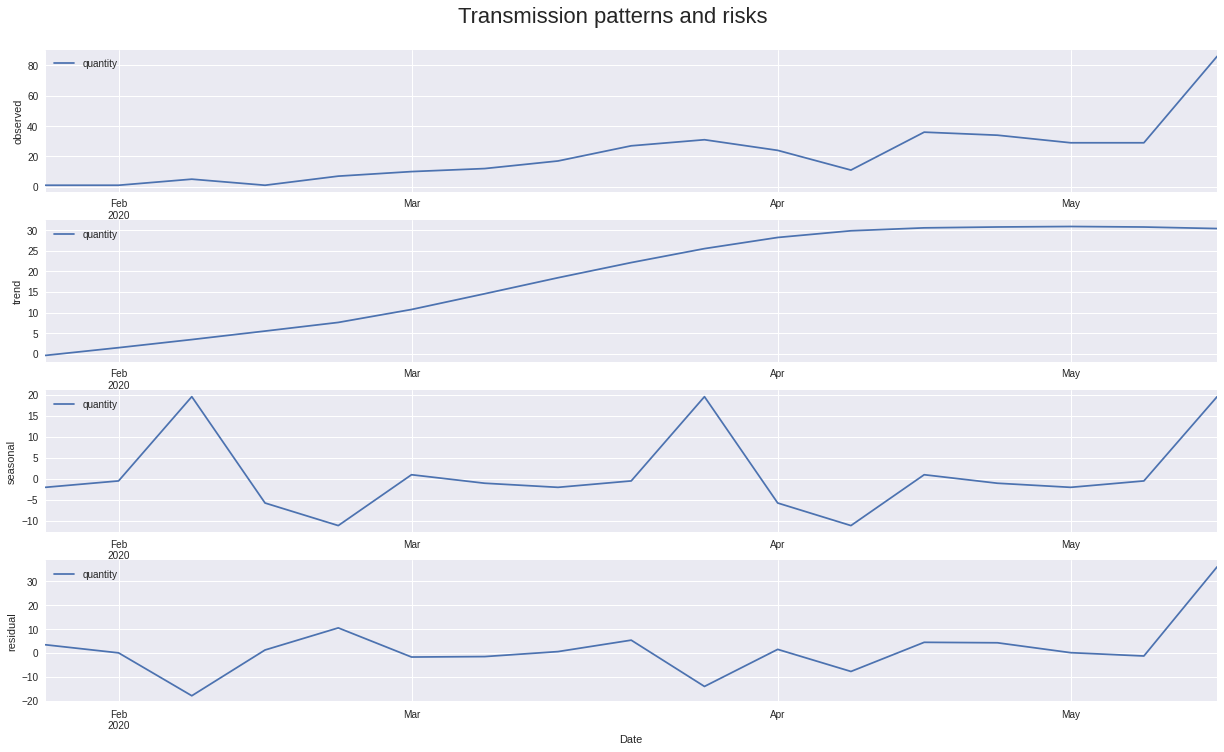

In [180]:
import matplotlib.pyplot as plt 

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp19.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp19.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp19.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp19.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Transmission patterns and risks', fontsize=22, y=0.93)  
# fig.savefig('Transmission patterns and risks.png')

Text(0.5, 0.93, 'Global political situation & others')

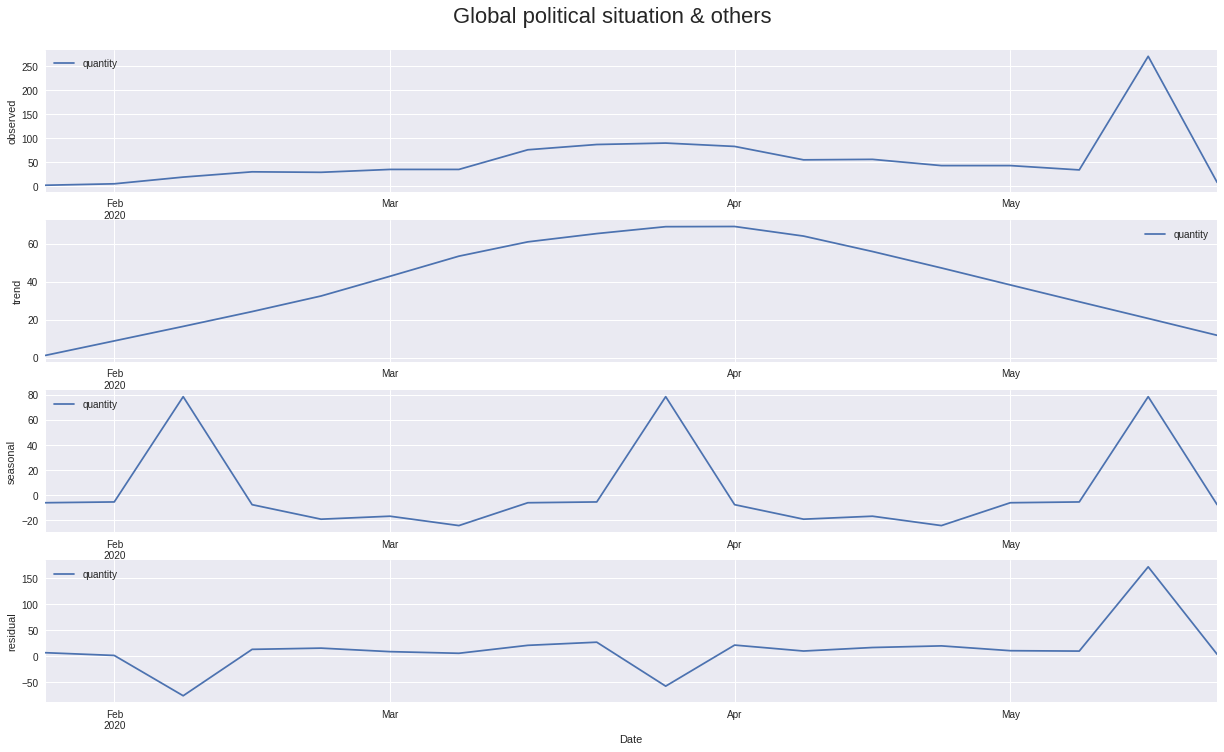

In [181]:
import matplotlib.pyplot as plt 

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp20.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp20.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp20.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp20.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Global political situation & others', fontsize=22, y=0.93)  
# fig.savefig('Global political situation & others.png')

Text(0.5, 0.93, 'Spread of rumors or misinformation on corona virus')

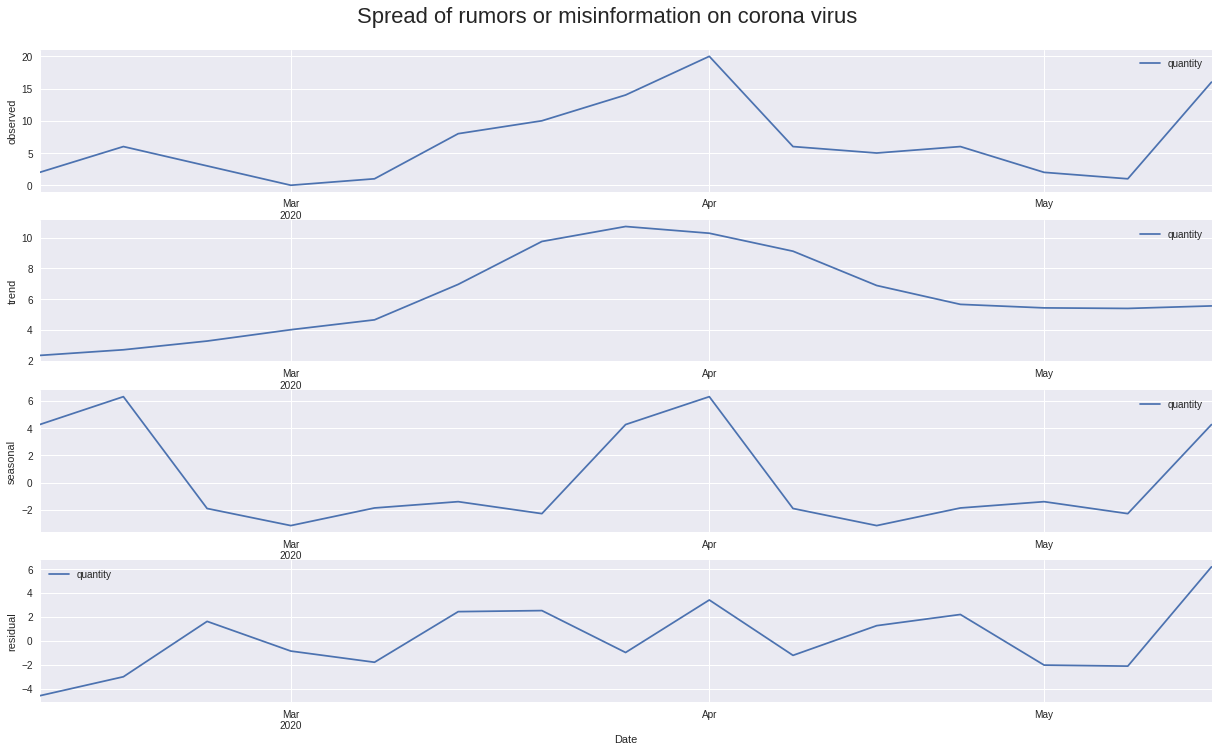

In [182]:
import matplotlib.pyplot as plt 

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp21.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp21.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp21.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp21.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Spread of rumors or misinformation on corona virus', fontsize=22, y=0.93)  
# fig.savefig('Spread of rumors or misinformation on corona virus.png')

Text(0.5, 0.93, 'Protective products and machines')

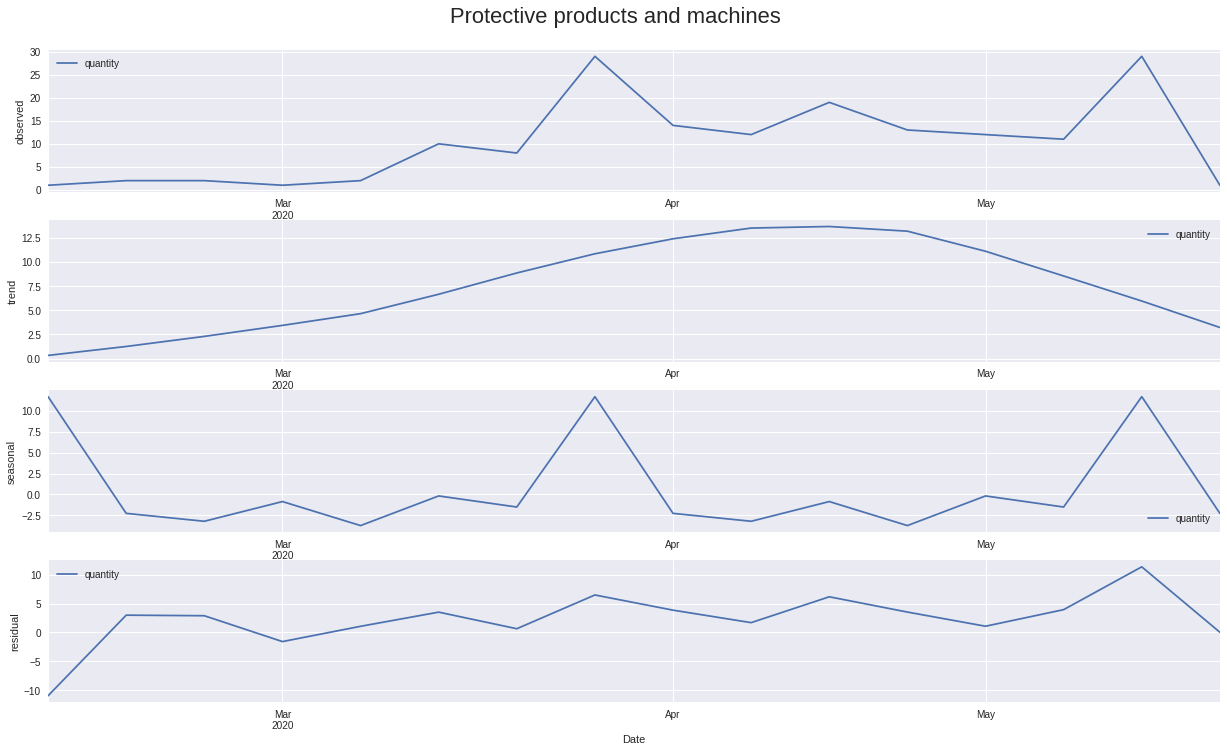

In [183]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp22.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp22.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp22.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp22.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Protective products and machines', fontsize=22, y=0.93)  
# fig.savefig('Protective products and machines.png')

# **New Dominant Category**

In [184]:
import pandas as pd
import numpy as np
import pickle
df_stemmed_bn = pd.read_pickle('df_stemmed_bn.pkl')
data = pd.read_pickle('NewspaperBD.pkl')

In [185]:
data

Url  ... Dominant Topic
0      https://www.thedailystar.net/coronavirus-updat...  ...              6
1      https://www.thedailystar.net/country/news/thro...  ...              3
2      https://www.thedailystar.net/country/news/copi...  ...              0
3      https://www.thedailystar.net/country/news/7-fa...  ...              7
4      https://www.thedailystar.net/coronavirus-updat...  ...              1
...                                                  ...  ...            ...
15560  https://www.kalerkantho.com/online/national/20...  ...              5
15561  https://www.kalerkantho.com/online/national/20...  ...              5
15562  https://www.kalerkantho.com/online/national/20...  ...              8
15563  https://www.kalerkantho.com/online/national/20...  ...              4
15564  https://www.kalerkantho.com/online/national/20...  ...              5

[15565 rows x 13 columns]

In [186]:
df1 = pd.DataFrame(columns = ['Date'])
df2 = pd.DataFrame(columns = ['Date'])
df3 = pd.DataFrame(columns = ['Date'])
df4 = pd.DataFrame(columns = ['Date'])
df5 = pd.DataFrame(columns = ['Date'])
df6 = pd.DataFrame(columns = ['Date'])
df7 = pd.DataFrame(columns = ['Date'])
df8 = pd.DataFrame(columns = ['Date'])
df9 = pd.DataFrame(columns = ['Date'])

In [187]:
df1['Date'] = data.loc[(data['Dominant Topic'] == 0), 'Publish Date'].copy()
df2['Date'] = data.loc[(data['Dominant Topic'] == 1),'Publish Date'].copy()
df3['Date'] = data.loc[(data['Dominant Topic'] == 2),'Publish Date'].copy()
df4['Date'] = data.loc[(data['Dominant Topic'] == 3),'Publish Date'].copy()
df5['Date'] = data.loc[(data['Dominant Topic'] == 4),'Publish Date'].copy()
df6['Date'] = data.loc[(data['Dominant Topic'] == 5),'Publish Date'].copy()
df7['Date'] = data.loc[(data['Dominant Topic'] == 6),'Publish Date'].copy()
df8['Date'] = data.loc[(data['Dominant Topic'] == 7),'Publish Date'].copy()
df9['Date'] = data.loc[(data['Dominant Topic'] == 8),'Publish Date'].copy()

In [188]:
df1

Date
2      2020-05-13 00:00:00+06:00
12     2020-05-12 21:40:18+06:00
16     2020-05-11 20:51:49+06:00
99     2020-03-22 21:03:59+06:00
115    2020-03-23 21:45:03+06:00
...                          ...
15416        2020-03-16 18:22:00
15507        2020-03-08 19:40:00
15509        2020-03-08 19:55:00
15543        2020-02-12 18:30:00
15549        2020-02-07 21:21:00

[543 rows x 1 columns]

In [189]:
df1['Date'] = pd.to_datetime(df1['Date'], utc=True)
df2['Date'] = pd.to_datetime(df2['Date'], utc=True)
df3['Date'] = pd.to_datetime(df3['Date'], utc=True)
df4['Date'] = pd.to_datetime(df4['Date'], utc=True)
df5['Date'] = pd.to_datetime(df5['Date'], utc=True)
df6['Date'] = pd.to_datetime(df6['Date'], utc=True)
df7['Date'] = pd.to_datetime(df7['Date'], utc=True)
df8['Date'] = pd.to_datetime(df8['Date'], utc=True)
df9['Date'] = pd.to_datetime(df9['Date'], utc=True)

In [190]:
#For counting news
df1['quantity'] = 1
df2['quantity'] = 1
df3['quantity'] = 1
df4['quantity'] = 1
df5['quantity'] = 1
df6['quantity'] = 1 
df7['quantity'] = 1
df8['quantity'] = 1
df9['quantity'] = 1    

In [191]:
df1 = df1.set_index('Date')
df2 = df2.set_index('Date')
df3 = df3.set_index('Date')
df4 = df4.set_index('Date')
df5 = df5.set_index('Date')
df6 = df6.set_index('Date')
df7 = df7.set_index('Date')
df8 = df8.set_index('Date')
df9 = df9.set_index('Date')

In [192]:
df1 = df1.sort_index()
df2 = df2.sort_index()
df3 = df3.sort_index()
df4 = df4.sort_index()
df5 = df5.sort_index()
df6 = df6.sort_index()
df7 = df7.sort_index()
df8 = df8.sort_index()
df9 = df9.sort_index()

In [193]:
df1 = df1['2020'].copy()
df2 = df2['2020'].copy()
df3 = df3['2020'].copy()
df4 = df4['2020'].copy()
df5 = df5['2020'].copy()
df6 = df6['2020'].copy()
df7 = df7['2020'].copy()
df8 = df8['2020'].copy()
df9 = df9['2020'].copy()

In [194]:
df1

quantity
Date                               
2020-02-06 00:00:00+00:00         1
2020-02-06 00:00:00+00:00         1
2020-02-07 00:00:00+00:00         1
2020-02-07 21:21:00+00:00         1
2020-02-09 00:00:00+00:00         1
...                             ...
2020-05-17 10:11:00+00:00         1
2020-05-18 12:21:00+00:00         1
2020-05-18 18:25:00+00:00         1
2020-05-19 16:30:00+00:00         1
2020-05-19 19:45:00+00:00         1

[543 rows x 1 columns]

In [195]:
!pip install stldecompose

In [196]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

# the main library has a small set of functionality
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive,
                                         drift, 
                                         mean, 
                                         seasonal_naive)


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [197]:
obs1D = (df1.resample('D').sum().interpolate('linear'))
obs2D = (df2.resample('D').sum().interpolate('linear'))
obs3D = (df3.resample('D').sum().interpolate('linear'))
obs4D = (df4.resample('D').sum().interpolate('linear'))
obs5D = (df5.resample('D').sum().interpolate('linear'))
obs6D = (df6.resample('D').sum().interpolate('linear'))
obs7D = (df7.resample('D').sum().interpolate('linear'))
obs8D = (df8.resample('D').sum().interpolate('linear'))
obs9D = (df9.resample('D').sum().interpolate('linear'))

In [198]:
obs1D

quantity
Date                               
2020-02-06 00:00:00+00:00         2
2020-02-07 00:00:00+00:00         2
2020-02-08 00:00:00+00:00         0
2020-02-09 00:00:00+00:00         2
2020-02-10 00:00:00+00:00         2
...                             ...
2020-05-15 00:00:00+00:00        23
2020-05-16 00:00:00+00:00       217
2020-05-17 00:00:00+00:00         1
2020-05-18 00:00:00+00:00         2
2020-05-19 00:00:00+00:00         2

[104 rows x 1 columns]

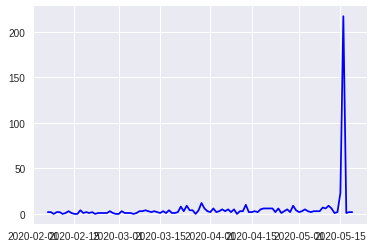

In [199]:
from matplotlib import pyplot as plt



plt.plot(obs1D.index, obs1D['quantity'], label='Daily News',color = 'blue')


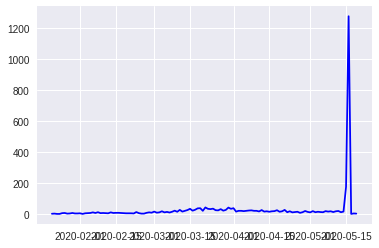

In [200]:
plt.plot(obs2D.index, obs2D['quantity'], label='Daily News',color = 'blue')

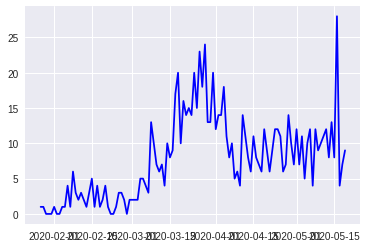

In [201]:
plt.plot(obs3D.index, obs3D['quantity'], label='Daily News',color = 'blue')

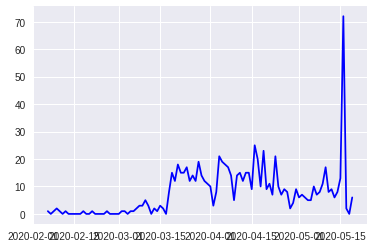

In [202]:
plt.plot(obs4D.index, obs4D['quantity'], label='Daily News',color = 'blue')

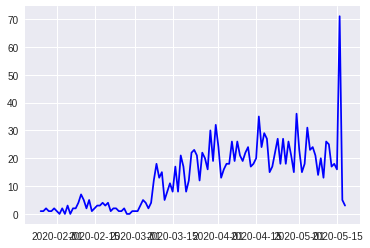

In [203]:
plt.plot(obs5D.index, obs5D['quantity'], label='Daily News',color = 'blue')

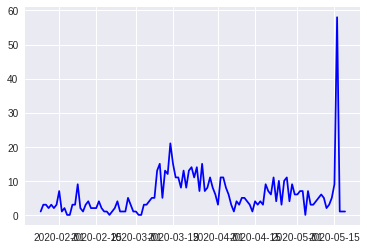

In [204]:
plt.plot(obs6D.index, obs6D['quantity'], label='Daily News',color = 'blue')

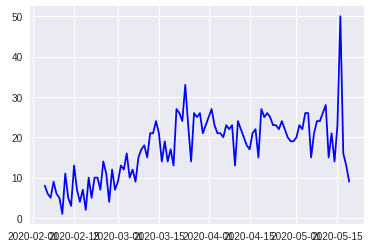

In [205]:
plt.plot(obs7D.index, obs7D['quantity'], label='Daily News',color = 'blue')

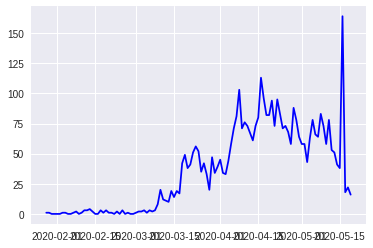

In [206]:
plt.plot(obs8D.index, obs8D['quantity'], label='Daily News',color = 'blue')

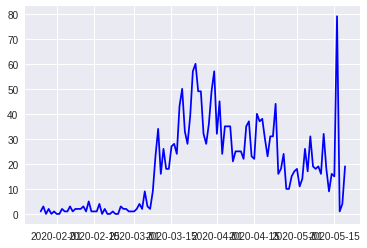

In [207]:
plt.plot(obs9D.index, obs9D['quantity'], label='Daily News',color = 'blue')

In [208]:
obs1 = (df1.resample('W').sum().interpolate('linear'))
obs2 = (df2.resample('W').sum().interpolate('linear'))
obs3 = (df3.resample('W').sum().interpolate('linear'))
obs4 = (df4.resample('W').sum().interpolate('linear'))
obs5 = (df5.resample('W').sum().interpolate('linear'))
obs6 = (df6.resample('W').sum().interpolate('linear'))
obs7 = (df7.resample('W').sum().interpolate('linear'))
obs8 = (df8.resample('W').sum().interpolate('linear'))
obs9 = (df9.resample('W').sum().interpolate('linear'))

In [209]:
obs1.index,obs2.index,obs2.index,obs4.index,obs4.index,obs6.index,obs7.index,obs8.index,obs9.index,

(DatetimeIndex(['2020-02-09 00:00:00+00:00', '2020-02-16 00:00:00+00:00',
                '2020-02-23 00:00:00+00:00', '2020-03-01 00:00:00+00:00',
                '2020-03-08 00:00:00+00:00', '2020-03-15 00:00:00+00:00',
                '2020-03-22 00:00:00+00:00', '2020-03-29 00:00:00+00:00',
                '2020-04-05 00:00:00+00:00', '2020-04-12 00:00:00+00:00',
                '2020-04-19 00:00:00+00:00', '2020-04-26 00:00:00+00:00',
                '2020-05-03 00:00:00+00:00', '2020-05-10 00:00:00+00:00',
                '2020-05-17 00:00:00+00:00', '2020-05-24 00:00:00+00:00'],
               dtype='datetime64[ns, UTC]', name='Date', freq='W-SUN'),
 DatetimeIndex(['2020-01-26 00:00:00+00:00', '2020-02-02 00:00:00+00:00',
                '2020-02-09 00:00:00+00:00', '2020-02-16 00:00:00+00:00',
                '2020-02-23 00:00:00+00:00', '2020-03-01 00:00:00+00:00',
                '2020-03-08 00:00:00+00:00', '2020-03-15 00:00:00+00:00',
                '2020-03-22 00:00:00+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7f7819085ac8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7821c4ec18>)

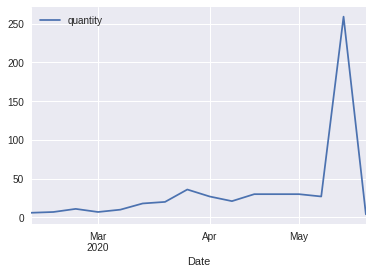

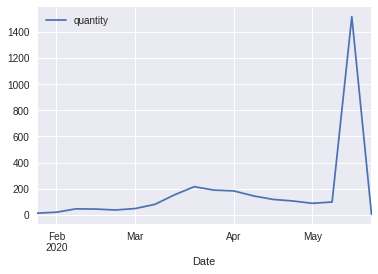

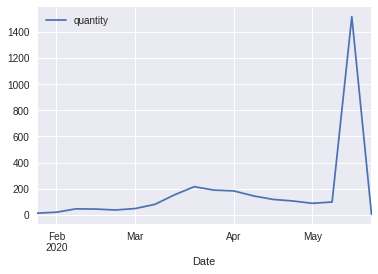

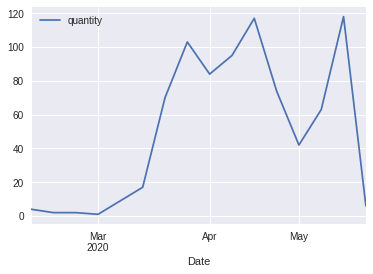

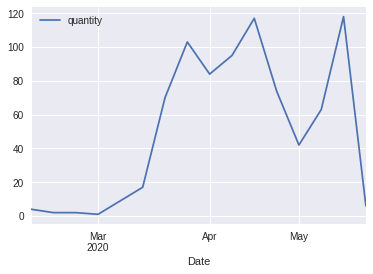

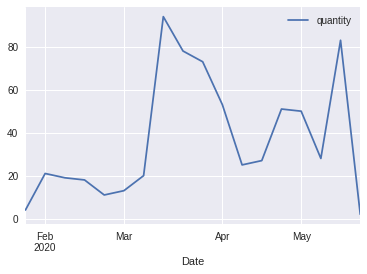

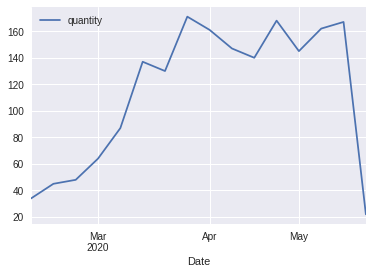

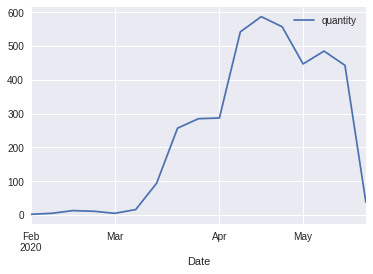

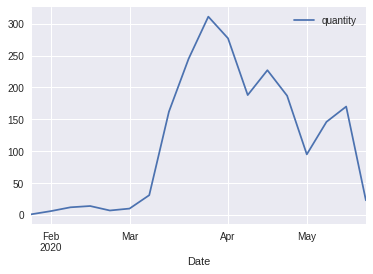

In [210]:
obs1.plot(),obs2.plot(),obs2.plot(),obs4.plot(),obs4.plot(),obs6.plot(),obs7.plot(),obs8.plot(),obs9.plot(),

In [211]:
decomp1 = decompose(obs1, period=7)
decomp2 = decompose(obs2, period=7)
decomp3 = decompose(obs3, period=7)
decomp4 = decompose(obs4, period=7)
decomp5 = decompose(obs5, period=7)
decomp6 = decompose(obs6, period=7)
decomp7 = decompose(obs7, period=7)
decomp8 = decompose(obs8, period=7)
decomp9 = decompose(obs9, period=7)

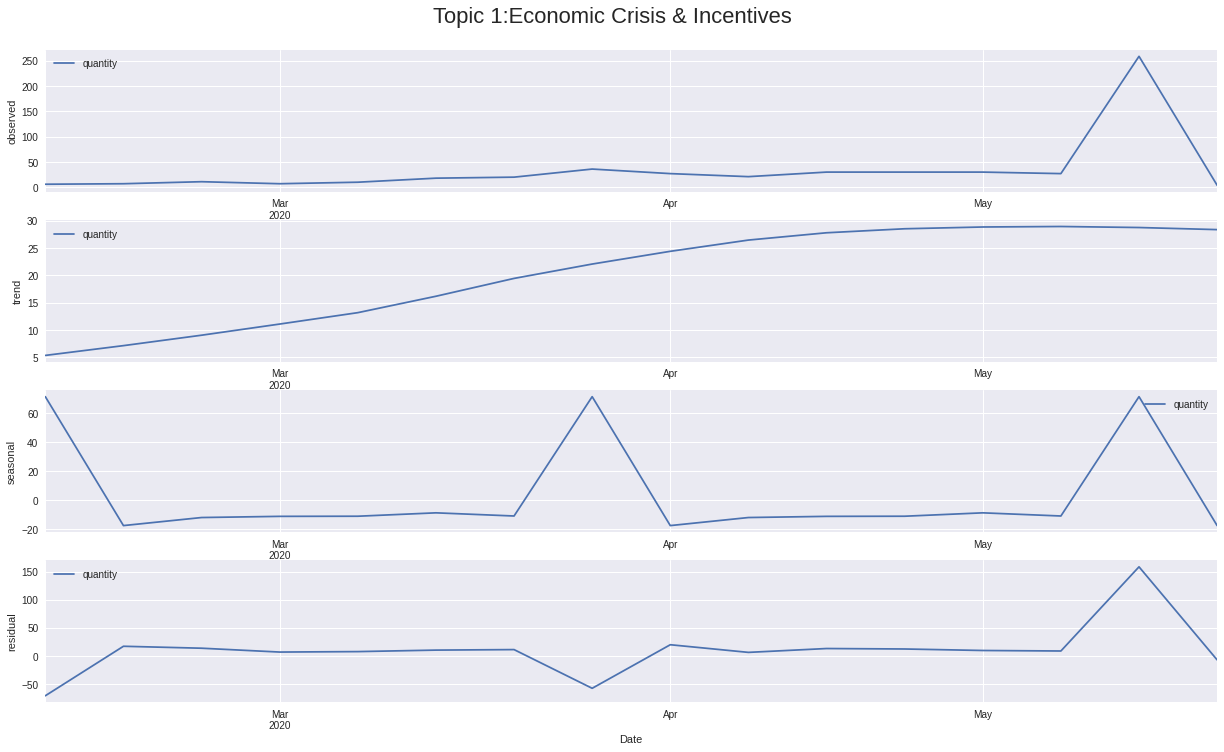

In [212]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp1.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp1.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp1.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp1.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Topic 1:Economic Crisis & Incentives', fontsize=22, y=0.93)  
fig.savefig('Time Series Decomposition 1.png')

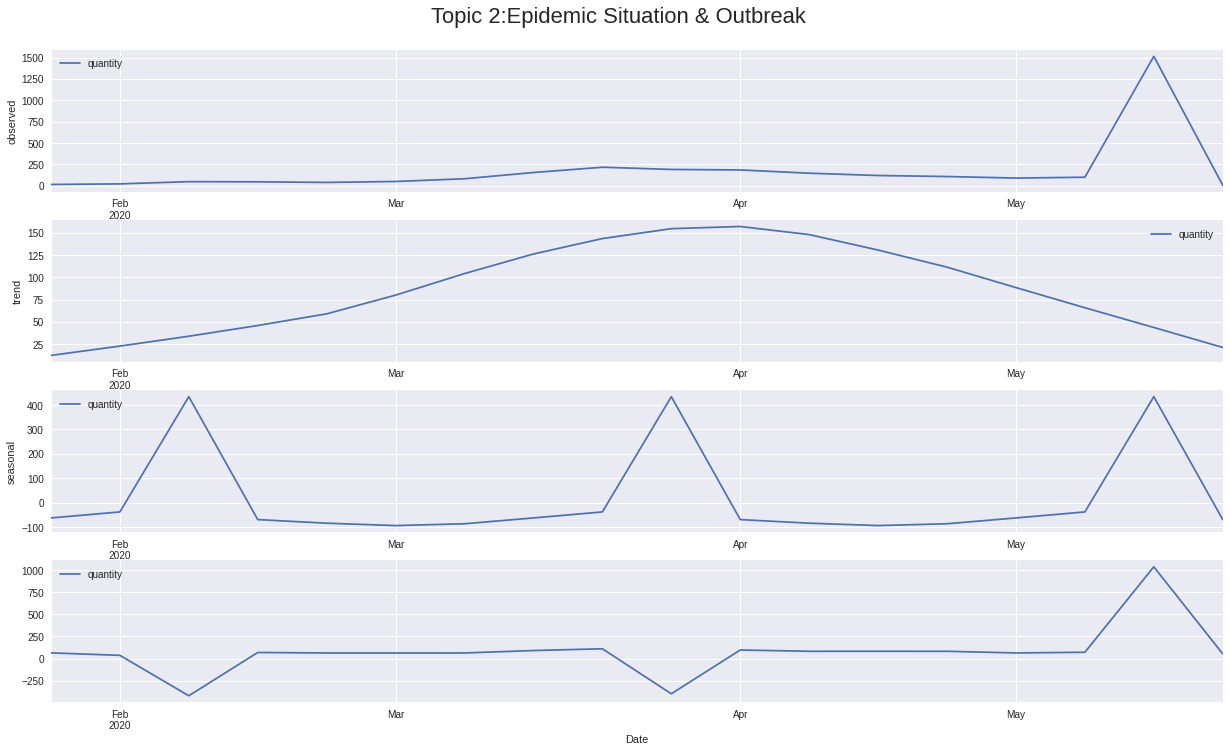

In [213]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp2.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp2.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp2.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp2.resid.plot(ax=ax4)
fig.suptitle('Topic 2:Epidemic Situation & Outbreak',fontsize=22, y=0.93) 
fig.savefig('Time Series Decomposition 2.png')

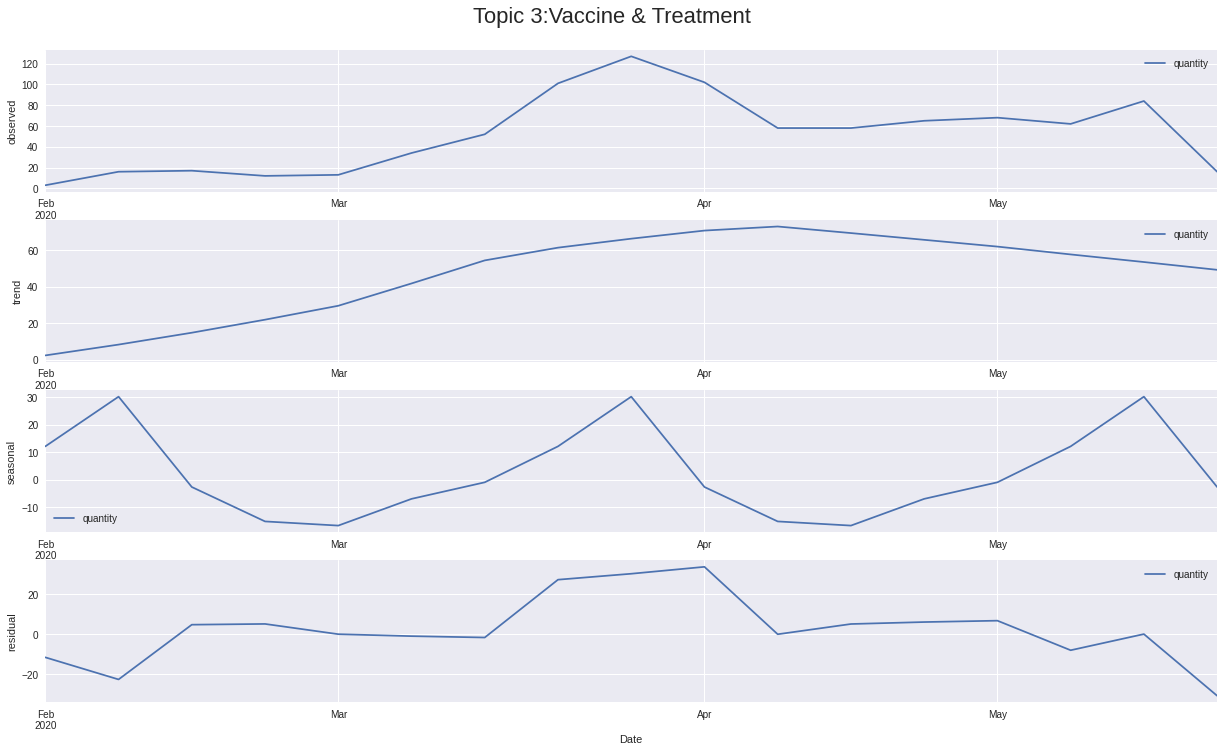

In [214]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp3.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp3.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp3.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp3.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Topic 3:Vaccine & Treatment', fontsize=22, y=0.93)  
fig.savefig('Time Series Decomposition 3.png')

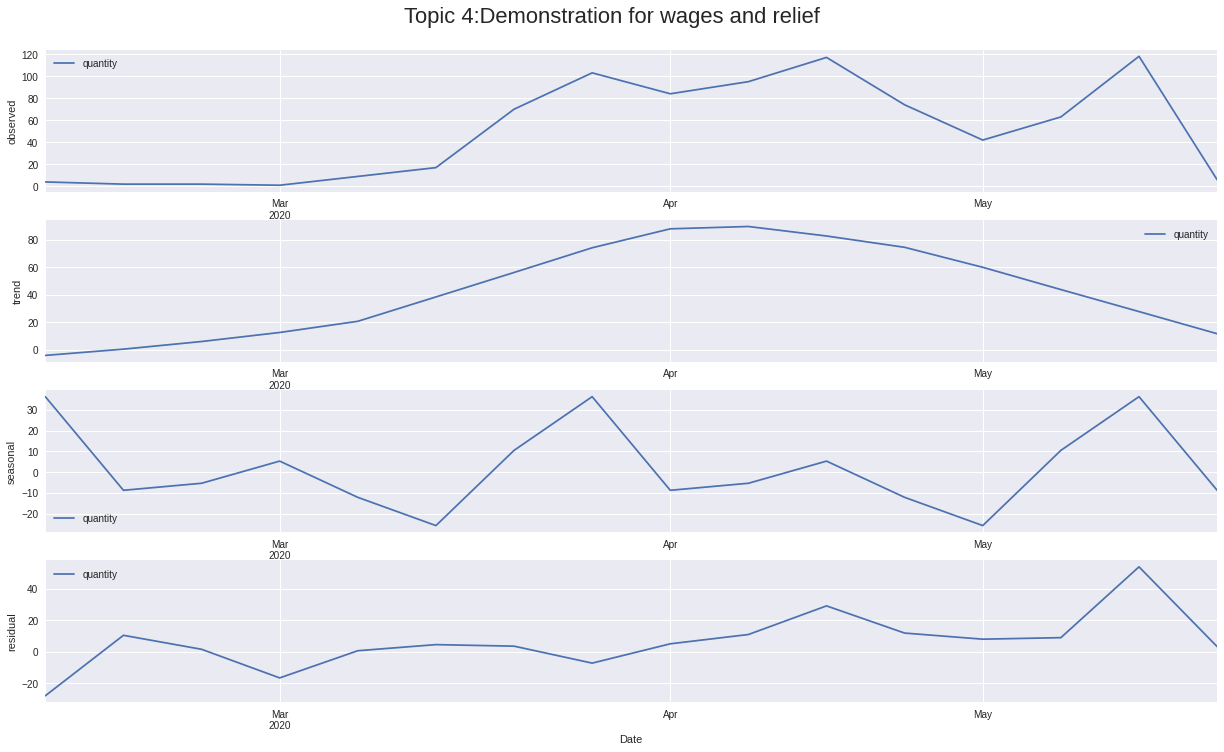

In [215]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp4.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp4.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp4.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp4.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Topic 4:Demonstration for wages and relief', fontsize=22, y=0.93)  
fig.savefig('Time Series Decomposition 4.png')

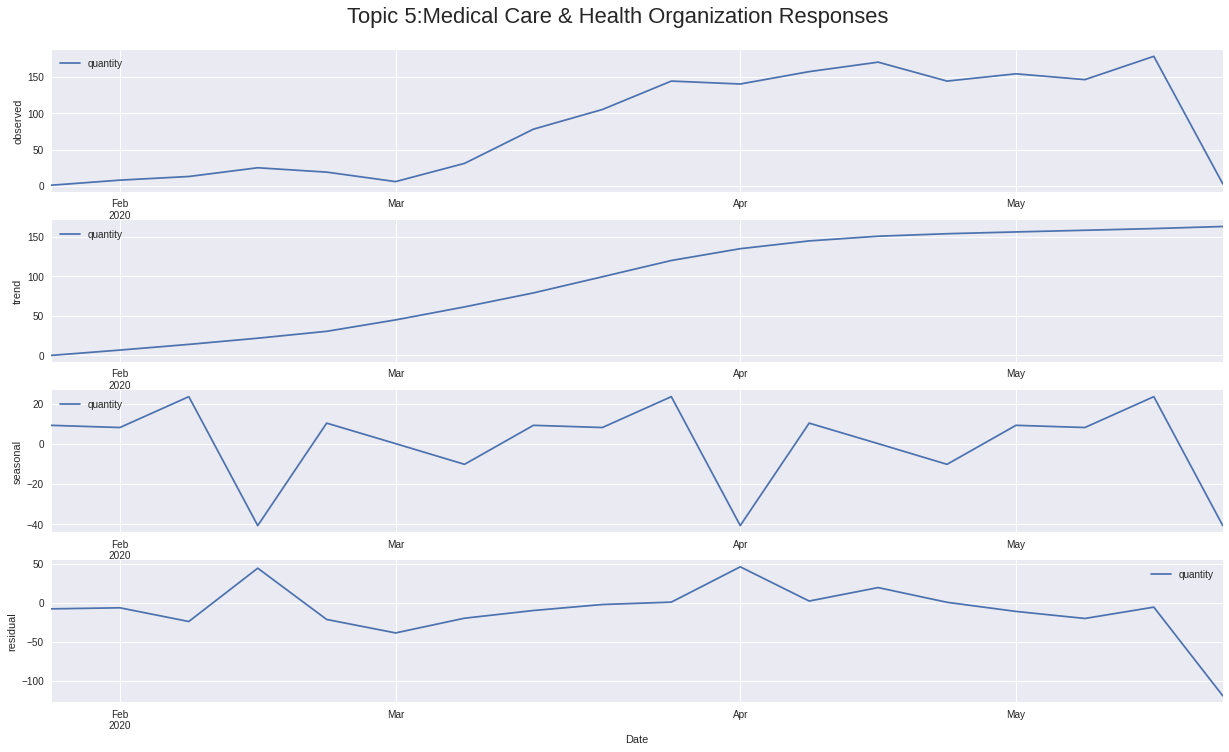

In [216]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp5.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp5.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp5.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp5.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Topic 5:Medical Care & Health Organization Responses', fontsize=22, y=0.93)  
fig.savefig('Time Series Decomposition 5.png')

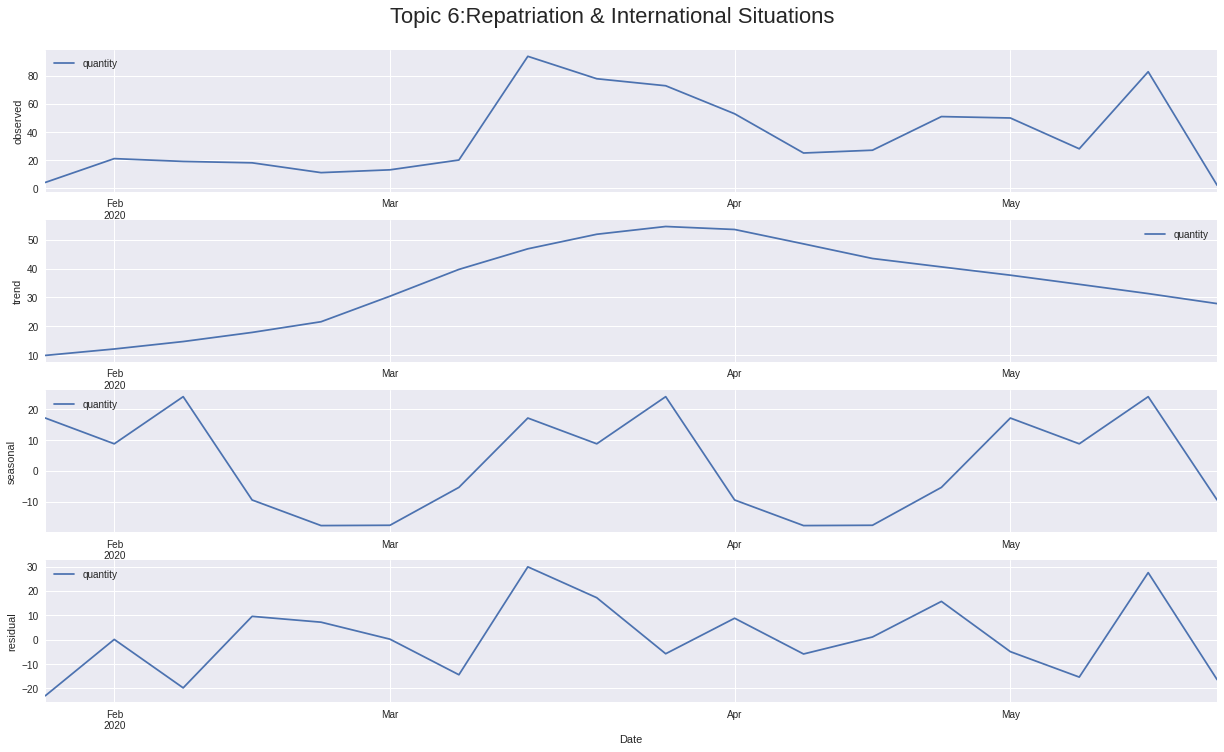

In [217]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp6.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp6.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp6.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp6.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Topic 6:Repatriation & International Situations', fontsize=22, y=0.93) 
fig.savefig('Time Series Decomposition 6.png')

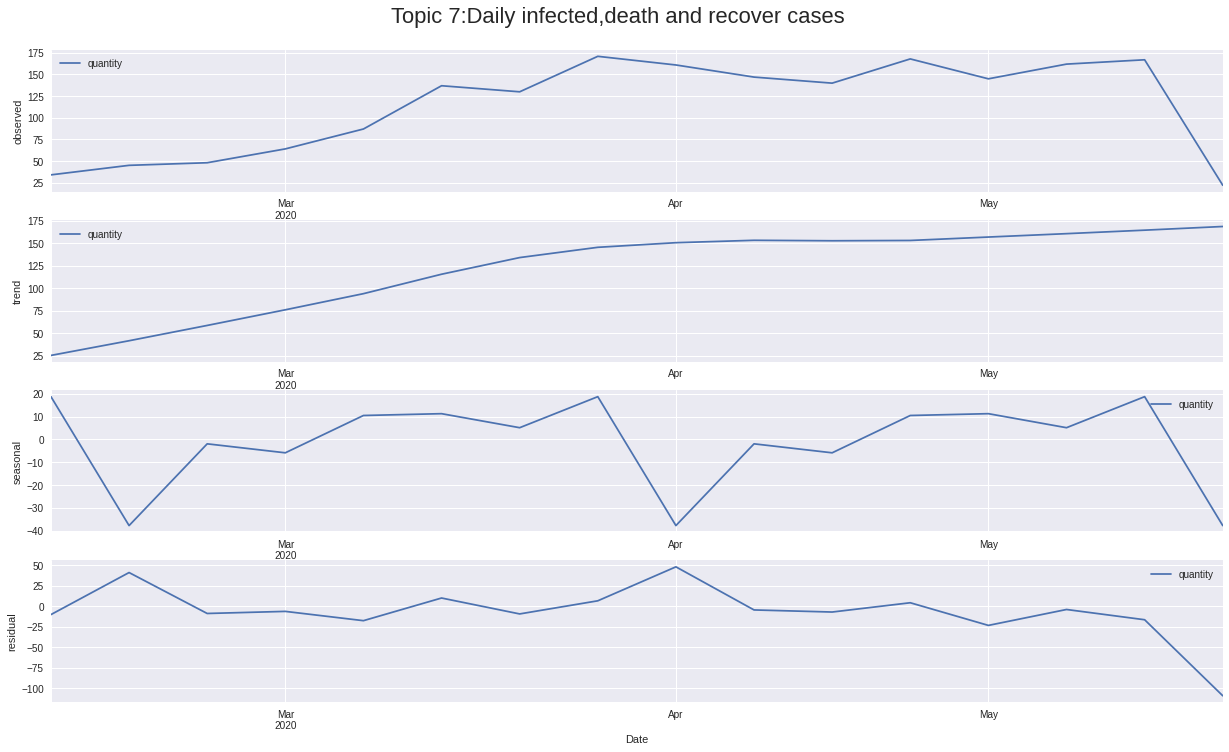

In [218]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp7.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp7.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp7.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp7.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Topic 7:Daily infected,death and recover cases', fontsize=22, y=0.93)  
fig.savefig('Time Series Decomposition 7.png')

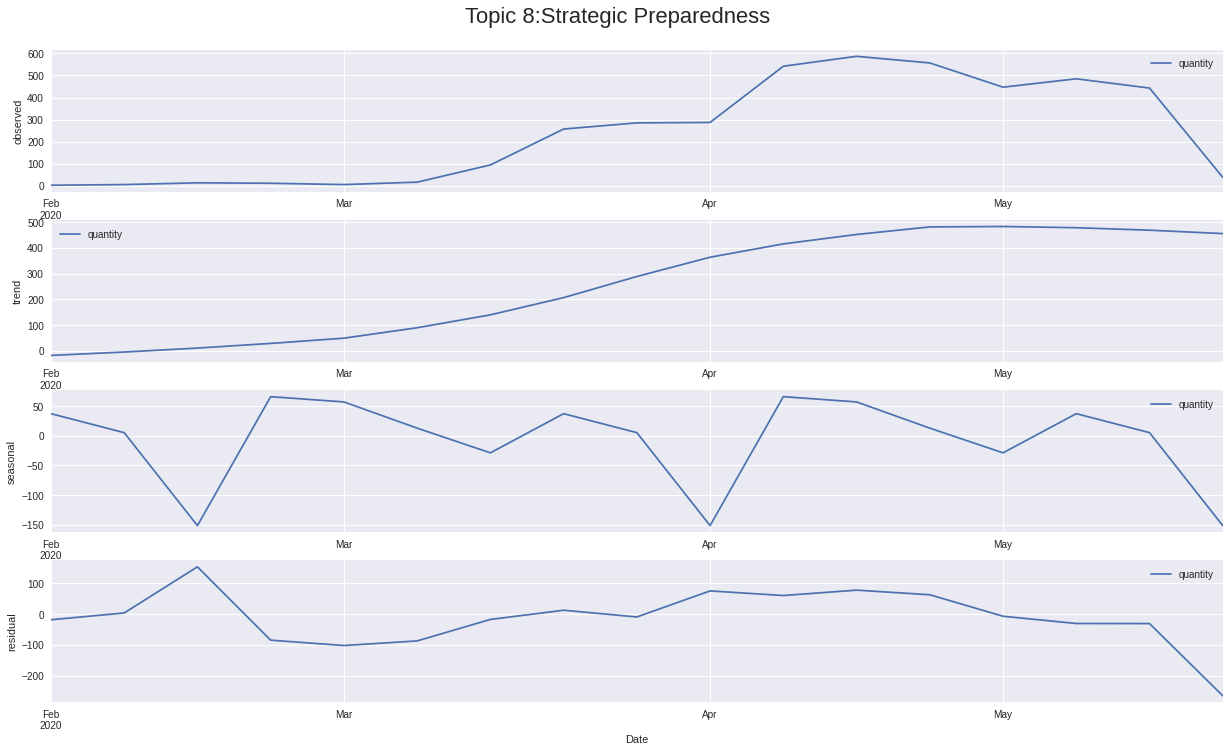

In [219]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp8.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp8.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp8.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp8.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Topic 8:Strategic Preparedness', fontsize=22, y=0.93)  
fig.savefig('Time Series Decomposition 8.png')

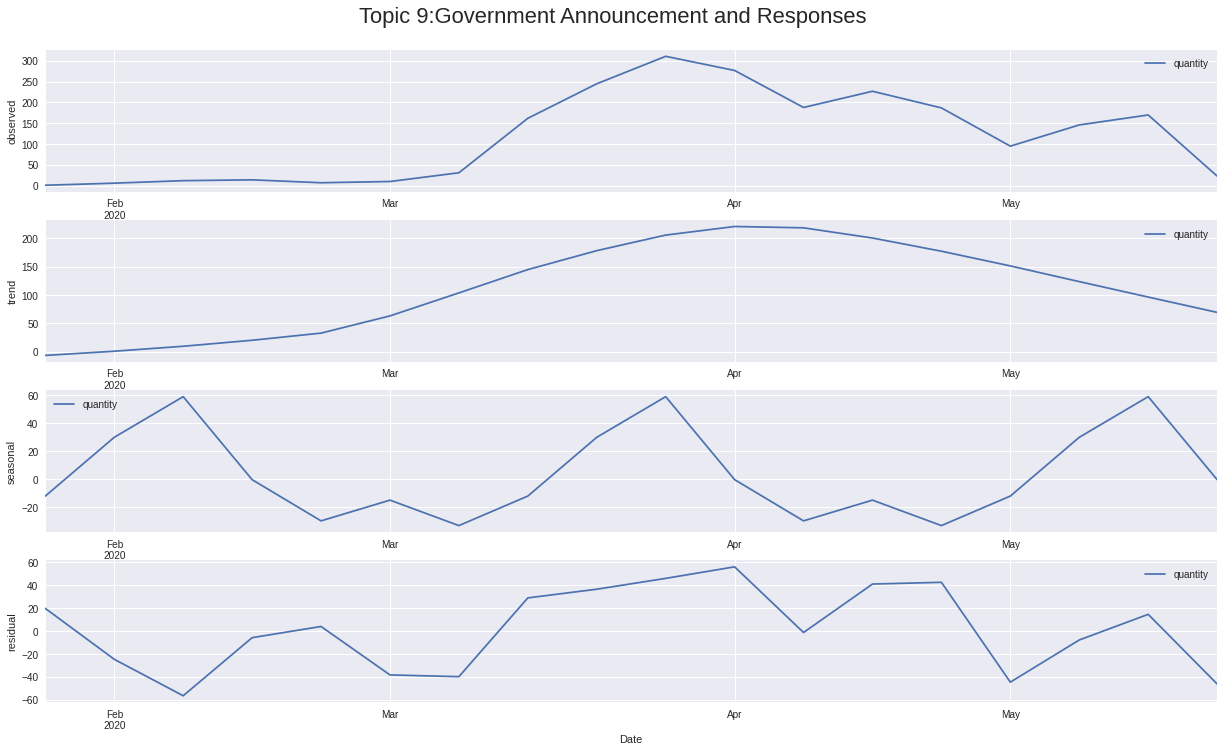

In [220]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(21,12))
decomp9.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomp9.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomp9.seasonal.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomp9.resid.plot(ax=ax4)
ax4.set_ylabel('residual')
fig.suptitle('Topic 9:Government Announcement and Responses', fontsize=22, y=0.93)  
fig.savefig('Time Series Decomposition 9.png')

In [221]:
dt = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRjNbbMYoyaSCDMXv5bSTd3Q6Cel7vvkzvOfJ4k-ZSrvv3p-Cl26Y1N2XcIVyHUGrtyhv4rDd7ViVdo/pub?output=csv')
dt = dt['Date']